<a href="https://colab.research.google.com/github/villafue/Capstone_1-_Predict_House_Prices/blob/master/House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello! This is my first Data Science Project. It is also my first Capstone project with Springboard. I'll focus on the business aspect. I created a scenario where I'm trying to convince the Ames company to hire me and hire a data science team, in other words, to convince them that Data Science is valuable for their business model. To that end, I will do my best to keep it simple, marketable, and executable for the company. 

Last, I am thankful for the plethora of notebooks that others were kind enough to share on Kaggle. I adapted many of their codes and processes in my notebook. I'll credit them here:

1. [Comprehensive Data Exploration with Python - Pedro Marcelino, Feb 2017](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
  - He did amazing EDA and helped me to learn as he told a story throughout the process.

2. [Stacked Regressions: Top 4% on LeaderBoard - Serigne, July 2017](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)
  - I really liked his data cleaning and imputing process. He described the logic behind what he did, and he also cleaned both the train and test set together (as did others).

3. [House Price Calculation methods for beginners - Bsivavenu, 2018](https://www.kaggle.com/bsivavenu/house-price-calculation-methods-for-beginners)
  - I used parts of his EDA especially for visualizing SalesPrice.

4. [#1 House Prices Solution (top 1%) - Jesuscristo (Nanashi), 2019](https://www.kaggle.com/jesucristo/1-house-prices-solution-top-1?scriptVersionId=20214677)
  - I used parts of his EDA for more detailed analysis

5. [Comprehensive Feature Engineering Tutorial - Pavan Sanagapati, 30 August 2020 ](https://www.kaggle.com/pavansanagapati/comprehensive-feature-engineering-tutorial)
  - Although not related to this specific dataset, his notebook was a big help in explaining the feature engineering in other people's notebooks.

6. [Stacking House Prices - Walkthrough to Top 5% - Arun Godwin Patel, 2018](https://www.kaggle.com/agodwinp/stacking-house-prices-walkthrough-to-top-5)
  - Arun's EDA and walkthrough is inviting, digestible, and beautiful. I adapted his code especially for visualizing the features.

***

## Content

1. **[Import packages](#import_packages)**
2. **[Load data](#load_data)**
3. **[Data preparation](#data_preparation)**
    - 3.1 - [Remove outliers](#remove_outliers)
    - 3.2 - [Treat missing values](#treat_missing_values)   
4. **[Exploratory Data Analysis](#exploratory_data_analysis)**
    - 4.1 - [Correlation matrix](#correlation_matrix)
    - 4.2 - [Feature engineering](#feature_engineering)
        - 4.2.1 - [Polynomials](#polynomials)
        - 4.2.2 - [Interior](#interior)
        - 4.2.3 - [Architectural & Structural](#architectural_&_structural)
        - 4.2.4 - [Exterior](#exterior)
        - 4.2.5 - [Location](#location)
        - 4.2.6 - [Land](#land)
        - 4.2.7 - [Access](#access)
        - 4.2.8 - [Utilities](#utilities)
        - 4.2.9 - [Miscellaneous](#miscellaneous)
    - 4.3 - [Target variable](#target_variable)
    - 4.4 - [Treating skewed features](#treating_skewed_features)
5. **[Modeling](#modeling)**
    - 5.1 - [Preparation of datasets](#preparation_of_datasets)
    - 5.2 - [Training](#training)
    - 5.3 - [Optimisation](#optimisation)
    - 5.4 - [Stacking](#stacking)
    - 5.5 - [Ensemble](#ensemble)
    - 5.6 - [Submission](#submission)
6. **[Conclusion](#conclusion)**   

***

<a id='import_packages'></a>
# 1. 
## Import packages

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from IPython.display import display
from scipy.stats.stats import pearsonr
pd.set_option('display.notebook_repr_html', True)
# I want to see all the columns in my output.
pd.set_option('max_columns', 82)
%matplotlib inline
pd.options.display.max_rows = 100
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
sns.set_palette(palette = mycols, n_colors = 4)

In [ ]:
# This first set of packages include Pandas, for data manipulation, numpy for mathematical computation and matplotlib & seaborn, for visualisation.
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')
print('Data Manipulation, Mathematical Computation and Visualisation packages imported!')

# Statistical packages used for transformations
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats.stats import pearsonr
print('Statistical packages imported!')

# Metrics used for measuring the accuracy and performance of the models
#from sklearn import metrics
#from sklearn.metrics import mean_squared_error
print('Metrics packages imported!')

# Algorithms used for modeling
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
print('Algorithm packages imported!')

# Pipeline and scaling preprocessing will be used for models that are sensitive
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print('Pipeline and preprocessing packages imported!')

# Model selection packages used for sampling dataset and optimising parameters
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
print('Model selection packages imported!')

# Set visualisation colours
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
sns.set_palette(palette = mycols, n_colors = 4)
print('My colours are ready! :)')

# To ignore annoying warning
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
warnings.filterwarnings("ignore", category=DeprecationWarning)
print('Deprecation warning will be ignored!')

The following code make's plots viewable in Colab's darkmode.

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use(['seaborn-whitegrid'])

I'll change my home directory because this is where I upload files, from my computer, into Colab.

In [ ]:
os.chdir('sample_data')

<a id='load_data'></a>
# 2. 
## Load data

- The Pandas package helps us work with our datasets. We start by reading the training and test datasets into DataFrames.
- We want to save the 'Id' columns from both datasets for later use when preparing the submission data.
- But we can drop them from the training and test datasets as they are redundant.

I import the train and test files directly from my Github. I also print out the head and shapes so can take a quick look at the data. 

In [ ]:
url = 'https://raw.githubusercontent.com/villafue/Capstone_1-_Predict_House_Prices/master/Data/test.csv'
test = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/villafue/Capstone_1-_Predict_House_Prices/master/Data/train.csv'
train = pd.read_csv(url)
print(test.shape, train.shape, '\n' * 2, 'Train has: ', train.shape[0], 'rows and ', train.shape[1], 'columns.', '\n', 
      'Test has: ', test.shape[0], 'rows and ', test.shape[1], 'columns.')
# This makes a little barrier between printed outputs.
print('\n', '=' * 136, '\n' * 2, 'Train Set:', '\n')
display(train.head())
print('\n', '=' * 136, '\n' * 2, 'Test Set:', '\n')
test.head()

(1459, 80) (1460, 81) 

 Train has:  1460 rows and  81 columns. 
 Test has:  1459 rows and  80 columns.


 Train Set: 



Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            



 Test Set: 



Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

I want to see the column names. Train and test have the column names except the latter does not have the price column.

In [ ]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

I'm going to save the "ID" columns and then drop them from the dataframes as they're unnecessary for modeling. 

Here is a helpful link for ".format" and strings. [Python Format Function](https://www.geeksforgeeks.org/python-format-function/#:~:text=Diamond%20star%20pattern-,Python%20%7C%20format()%20function,a%20string%20through%20positional%20formatting.)

In [ ]:
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

print("The train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


I want to see the count of non-null values and if the columns are numeric or categorical.

In [ ]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

I want to see which columns have categorical features (strings).

In [ ]:
all_object = [f for f in all.columns if all.dtypes[f] == 'object']
all_object = pd.DataFrame(all_object)
all_object.rename(columns={0: 'Object_Type'}, inplace=True)
all_object

Object_Type
0        MSZoning
1          Street
2           Alley
3        LotShape
4     LandContour
5       Utilities
6       LotConfig
7       LandSlope
8    Neighborhood
9      Condition1
10     Condition2
11       BldgType
12     HouseStyle
13      RoofStyle
14       RoofMatl
15    Exterior1st
16    Exterior2nd
17     MasVnrType
18      ExterQual
19      ExterCond
20     Foundation
21       BsmtQual
22       BsmtCond
23   BsmtExposure
24   BsmtFinType1
25   BsmtFinType2
26        Heating
27      HeatingQC
28     CentralAir
29     Electrical
30    KitchenQual
31     Functional
32    FireplaceQu
33     GarageType
34   GarageFinish
35     GarageQual
36     GarageCond
37     PavedDrive
38         PoolQC
39          Fence
40    MiscFeature
41       SaleType
42  SaleCondition

I want to see which columns are numerical (ints and floats).

In [ ]:
all_numeric = [f for f in all.columns if all.dtypes[f] != 'object']
all_numeric = pd.DataFrame(all_numeric)
all_numeric.drop([0], inplace=True)
all_numeric.rename(columns={0: 'Numeric_Type'}, inplace=True)
all_numeric.reset_index(inplace=True)
all_numeric.drop(columns='index', inplace=True)
all_numeric

Numeric_Type
0     LotFrontage
1         LotArea
2     OverallQual
3     OverallCond
4       YearBuilt
5    YearRemodAdd
6      MasVnrArea
7      BsmtFinSF1
8      BsmtFinSF2
9       BsmtUnfSF
10    TotalBsmtSF
11       1stFlrSF
12       2ndFlrSF
13   LowQualFinSF
14      GrLivArea
15   BsmtFullBath
16   BsmtHalfBath
17       FullBath
18       HalfBath
19   BedroomAbvGr
20   KitchenAbvGr
21   TotRmsAbvGrd
22     Fireplaces
23    GarageYrBlt
24     GarageCars
25     GarageArea
26     WoodDeckSF
27    OpenPorchSF
28  EnclosedPorch
29      3SsnPorch
30    ScreenPorch
31       PoolArea
32        MiscVal
33         MoSold
34         YrSold

I want to see how many unique values exist in my dataframe.

In [ ]:
all.nunique().sort_values(ascending=False)

LotArea          1951
GrLivArea        1292
BsmtUnfSF        1135
1stFlrSF         1083
TotalBsmtSF      1058
BsmtFinSF1        991
2ndFlrSF          635
GarageArea        603
MasVnrArea        444
WoodDeckSF        379
BsmtFinSF2        272
OpenPorchSF       252
EnclosedPorch     183
LotFrontage       128
ScreenPorch       121
YearBuilt         118
GarageYrBlt       103
YearRemodAdd       61
MiscVal            38
LowQualFinSF       36
3SsnPorch          31
Neighborhood       25
Exterior2nd        16
MSSubClass         16
Exterior1st        15
PoolArea           14
TotRmsAbvGrd       14
MoSold             12
OverallQual        10
OverallCond         9
Condition1          9
SaleType            9
BedroomAbvGr        8
Condition2          8
HouseStyle          8
RoofMatl            8
Functional          7
Foundation          6
BsmtFinType1        6
RoofStyle           6
BsmtFinType2        6
SaleCondition       6
Heating             6
GarageCars          6
GarageType          6
Fireplaces

I want to see the percent of unique values per column.

In [ ]:
all.nunique().sort_values(ascending=False)/all.shape[0] * 100

LotArea          66.837958
GrLivArea        44.261733
BsmtUnfSF        38.883179
1stFlrSF         37.101747
TotalBsmtSF      36.245289
BsmtFinSF1       33.949983
2ndFlrSF         21.754025
GarageArea       20.657760
MasVnrArea       15.210689
WoodDeckSF       12.983899
BsmtFinSF2        9.318260
OpenPorchSF       8.633094
EnclosedPorch     6.269270
LotFrontage       4.385063
ScreenPorch       4.145255
YearBuilt         4.042480
GarageYrBlt       3.528606
YearRemodAdd      2.089757
MiscVal           1.301816
LowQualFinSF      1.233299
3SsnPorch         1.062008
Neighborhood      0.856458
Exterior2nd       0.548133
MSSubClass        0.548133
Exterior1st       0.513875
PoolArea          0.479616
TotRmsAbvGrd      0.479616
MoSold            0.411100
OverallQual       0.342583
OverallCond       0.308325
Condition1        0.308325
SaleType          0.308325
BedroomAbvGr      0.274066
Condition2        0.274066
HouseStyle        0.274066
RoofMatl          0.274066
Functional        0.239808
F

I want to see the summary statistics of each numeric column. Some of these columns are categorical and coded as numerical, but I'll deal with them later.

In [ ]:
all.describe().T

count          mean          std     min     25%     50%  \
MSSubClass     2919.0     57.137718    42.517628    20.0    20.0    50.0   
LotFrontage    2433.0     69.305795    23.344905    21.0    59.0    68.0   
LotArea        2919.0  10168.114080  7886.996359  1300.0  7478.0  9453.0   
OverallQual    2919.0      6.089072     1.409947     1.0     5.0     6.0   
OverallCond    2919.0      5.564577     1.113131     1.0     5.0     5.0   
YearBuilt      2919.0   1971.312778    30.291442  1872.0  1953.5  1973.0   
YearRemodAdd   2919.0   1984.264474    20.894344  1950.0  1965.0  1993.0   
MasVnrArea     2896.0    102.201312   179.334253     0.0     0.0     0.0   
BsmtFinSF1     2918.0    441.423235   455.610826     0.0     0.0   368.5   
BsmtFinSF2     2918.0     49.582248   169.205611     0.0     0.0     0.0   
BsmtUnfSF      2918.0    560.772104   439.543659     0.0   220.0   467.0   
TotalBsmtSF    2918.0   1051.777587   440.766258     0.0   793.0   989.5   
1stFlrSF       2919.0   1159.581706   392.362079   334.0   876.0  1082.0   
2ndFlrSF       2919.0    336.483727   428.701456     0.0     0.0     0.0   
LowQualFinSF   2919.0      4.694416    46.396825     0.0     0.0     0.0   
GrLivArea      2919.0   1500.759849   506.051045   334.0  1126.0  1444.0   
BsmtFullBath   2917.0      0.429894     0.524736     0.0     0.0     0.0   
BsmtHalfBath   2917.0      0.061364     0.245687     0.0     0.0     0.0   
FullBath       2919.0      1.568003     0.552969     0.0     1.0     2.0   
HalfBath       2919.0      0.380267     0.502872     0.0     0.0     0.0   
BedroomAbvGr   2919.0      2.860226     0.822693     0.0     2.0     3.0   
KitchenAbvGr   2919.0      1.044536     0.214462     0.0     1.0     1.0   
TotRmsAbvGrd   2919.0      6.451524     1.569379     2.0     5.0     6.0   
Fireplaces     2919.0      0.597122     0.646129     0.0     0.0     1.0   
GarageYrBlt    2760.0   1978.113406    25.574285  1895.0  1960.0  1979.0   
GarageCars     2918.0      1.766621     0.761624     0.0     1.0     2.0   
GarageArea     2918.0    472.874572   215.394815     0.0   320.0   480.0   
WoodDeckSF     2919.0     93.709832   126.526589     0.0     0.0     0.0   
OpenPorchSF    2919.0     47.486811    67.575493     0.0     0.0    26.0   
EnclosedPorch  2919.0     23.098321    64.244246     0.0     0.0     0.0   
3SsnPorch      2919.0      2.602261    25.188169     0.0     0.0     0.0   
ScreenPorch    2919.0     16.062350    56.184365     0.0     0.0     0.0   
PoolArea       2919.0      2.251799    35.663946     0.0     0.0     0.0   
MiscVal        2919.0     50.825968   567.402211     0.0     0.0     0.0   
MoSold         2919.0      6.213087     2.714762     1.0     4.0     6.0   
YrSold         2919.0   2007.792737     1.314964  2006.0  2007.0  2008.0   

                   75%       max  
MSSubClass        70.0     190.0  
LotFrontage       80.0     313.0  
LotArea        11570.0  215245.0  
OverallQual        7.0      10.0  
OverallCond        6.0       9.0  
YearBuilt       2001.0    2010.0  
YearRemodAdd    2004.0    2010.0  
MasVnrArea       164.0    1600.0  
BsmtFinSF1       733.0    5644.0  
BsmtFinSF2         0.0    1526.0  
BsmtUnfSF        805.5    2336.0  
TotalBsmtSF     1302.0    6110.0  
1stFlrSF        1387.5    5095.0  
2ndFlrSF         704.0    2065.0  
LowQualFinSF       0.0    1064.0  
GrLivArea       1743.5    5642.0  
BsmtFullBath       1.0       3.0  
BsmtHalfBath       0.0       2.0  
FullBath           2.0       4.0  
HalfBath           1.0       2.0  
BedroomAbvGr       3.0       8.0  
KitchenAbvGr       1.0       3.0  
TotRmsAbvGrd       7.0      15.0  
Fireplaces         1.0       4.0  
GarageYrBlt     2002.0    2207.0  
GarageCars         2.0       5.0  
GarageArea       576.0    1488.0  
WoodDeckSF       168.0    1424.0  
OpenPorchSF       70.0     742.0  
EnclosedPorch      0.0    1012.0  
3SsnPorch          0.0     508.0  
ScreenPorch        0.0     576.0  
PoolArea           0.0     800.0  
MiscVal      

***

<a id='data_preparation'></a>
# 3. 
## Data preparation

<a id='remove_outliers'></a>
### 3.1 - Remove outliers

Outliers

The author of the Ames Housing Dataset recommends removing certian observations. These are 'GrLivArea' over over 4000. [Ames Housing Article](http://jse.amstat.org/v19n3/decock.pdf)

In [ ]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
g = sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], fit_reg=False).set_title("Before")

# Delete outliers
plt.subplot(1, 2, 2)                                                                                
train = train.drop(train[(train['GrLivArea']>4000)].index)
g = sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], fit_reg=False).set_title("After")

I'm going to transform some numerical variables into strings because they are really categorical variables. If I keep them numeric, then the model will treat them as continuous variables.

In [ ]:
# # MSSubClass: Identifies the type of dwelling involved in the sale.
# all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


# # OverallCond: Rates the overall condition of the house
# all_data['OverallCond'] = all_data['OverallCond'].astype(str)


# # Year (YYYY) and month (MM) sold are transformed into categorical features.
# all_data['YrSold'] = all_data['YrSold'].astype(str)
# all_data['MoSold'] = all_data['MoSold'].astype(str)

# # GarageYrBlt: Year garage was built
# all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(str)



***

<a id='treat_missing_values'></a>
### 3.2 - Treat missing values

I will concatenate the train and test sets into one dataframe so I can study and clean it. 

In [ ]:
# I don't know why I'm saving the shapes of train and test
ntrain = train.shape[0]
ntest = test.shape[0]
# I guess this is because I'm going to use this for y-train later
y_train = train.SalePrice.values

all = pd.concat((train, test)).reset_index(drop=True)
all.drop(['SalePrice'], axis=1, inplace=True)
print("The full data size is : {}".format(all.shape))

The full data size is : (2919, 79)


I want to visualize the missing values in my data.

In [ ]:
all_na = (all.isnull().sum() / len(all)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)[:18]
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks()
sns.barplot(x=all_na, y=all_na.index, orient="h")
plt.xlabel('Percent of missing values', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

Text(0.5, 1.0, 'Percent missing data by feature')

I want a more detailed look at my missing values.

In [ ]:
total = all.isnull().sum().sort_values(ascending=False)
percent = (all.isnull().sum()/all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent']>0]

Total   Percent
PoolQC         2909  0.996574
MiscFeature    2814  0.964029
Alley          2721  0.932169
Fence          2348  0.804385
FireplaceQu    1420  0.486468
LotFrontage     486  0.166495
GarageCond      159  0.054471
GarageQual      159  0.054471
GarageYrBlt     159  0.054471
GarageFinish    159  0.054471
GarageType      157  0.053786
BsmtCond         82  0.028092
BsmtExposure     82  0.028092
BsmtQual         81  0.027749
BsmtFinType2     80  0.027407
BsmtFinType1     79  0.027064
MasVnrType       24  0.008222
MasVnrArea       23  0.007879
MSZoning          4  0.001370
BsmtHalfBath      2  0.000685
Utilities         2  0.000685
Functional        2  0.000685
BsmtFullBath      2  0.000685
BsmtFinSF2        1  0.000343
BsmtFinSF1        1  0.000343
Exterior2nd       1  0.000343
BsmtUnfSF         1  0.000343
TotalBsmtSF       1  0.000343
Exterior1st       1  0.000343
SaleType          1  0.000343
Electrical        1  0.000343
KitchenQual       1  0.000343
GarageArea        1  0.000343
GarageCars        1  0.000343

The following cells are imputations of the missing values. 
When a variable does not have it's respective feature, I used "None" value  for categorical features and "0" for numerical features. This is because N/A does not work for some computations and models.
"Data Description Text file" is abbreviated to DDTF. 

**PoolQC**: DDTF says NA means "No Pool". This makes sense as most homes probably do not have pools.

In [ ]:
all["PoolQC"] = all["PoolQC"].fillna("None")

**MiscFeature**: DDTF says NA means "no misc feature". 

In [ ]:
all["MiscFeature"] = all["MiscFeature"].fillna("None")

**Alley**: DDTF says NA means "no alley access".

In [ ]:
all["Alley"] = all["Alley"].fillna("None")

**Fence**: DDTF data description says NA means "no fence".

In [ ]:
all["Fence"] = all["Fence"].fillna("None")

**FireplaceQu**: DDTF says NA means "no fireplace".

In [ ]:
all["FireplaceQu"] = all["FireplaceQu"].fillna("None")

**LotFrontage**: I imputed using the median as the area of the connecting street, to the property, should be similar to other homes in it's neighborhood. 

In [ ]:
all["LotFrontage"] = all.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

**GarageType, GarageFinish, GarageQual, GarageCond**: Replaced missing data with None as NA means "no garage".

In [ ]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all[col] = all[col].fillna('None')

**GarageYrBlt, GarageArea and GarageCars**: I replace the missing data with 0 because no garage = no cars. 

HOWEVER, I will keep GarageYrBlt in mind as imputing with a year of 0 does not make sense.

In [ ]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all[col] = all[col].fillna(0)

**BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath**: missing values are likely 0 for having no basement.

HOWEVER, it bothers me having 0 instead of NaN for numeric features.

In [ ]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all[col] = all[col].fillna('None')

**BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2**: For all these categorical basement-related features, NaN means no basement.

In [ ]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all[col] = all[col].fillna('None')

**MasVnrArea and MasVnrType**: I'll fill in None for no masonry veneer and 0 for the area. However, I still disagree with this.

In [ ]:
all["MasVnrType"] = all["MasVnrType"].fillna("None")
all["MasVnrArea"] = all["MasVnrArea"].fillna(0)

**MSZoning (The general zoning classification)**: 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [ ]:
all['MSZoning'] = all['MSZoning'].fillna(all['MSZoning'].mode()[0])

**Functional**: DDTF says NA means typical (Typ) which is also the mode. Thus, if it's missing values it is most probably 'Typ.'

In [ ]:
all["Functional"] = all["Functional"].fillna("Typ")

**Electrical**: Electrical only has one NA value so I imputed using the Mode.

In [ ]:
all['Electrical'] = all['Electrical'].fillna(all['Electrical'].mode()[0])

**KitchenQual**: It has only one NA value, and like Electrical, we set it to the mode which is TA for Typical/Average.

In [ ]:
all['KitchenQual'] = all['KitchenQual'].fillna(all['KitchenQual'].mode()[0])

**Exterior1st and Exterior2nd**: Both Exterior 1 and 2 only have 1 missing value and I will just impute it using the mode.

In [ ]:
all['Exterior1st'] = all['Exterior1st'].fillna(all['Exterior1st'].mode()[0])
all['Exterior2nd'] = all['Exterior2nd'].fillna(all['Exterior2nd'].mode()[0])

**SaleType**: I will fill using it's most common value which is WD for Warranty Deed - Conventional

In [ ]:
all['SaleType'] = all['SaleType'].fillna(all['SaleType'].mode()[0])

**MSSubClass**: This identifies the type of dwelling involved in the sale, and I will impute using the mode. 

In [ ]:
all['MSSubClass'] = all['MSSubClass'].fillna(all['MSSubClass'].mode()[0])

**Utilities**: For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA. However, because the Test dataset has only 1 value for this column, and it is constant, it holds no predictive power. I'll drop this column.

In [ ]:
# From inspection, we can remove Utilities
all_data = all_data.drop(['Utilities'], axis=1)

all_data_na = all_data.isnull().sum()
print("Features with missing values: ", len(all_data_na.drop(all_data_na[all_data_na == 0].index)))

Are there any remaining missing values?

In [ ]:
total = all.isnull().sum().sort_values(ascending=False)
percent = (all.isnull().sum()/all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent']>0]
all_data_na = all_data.isnull().sum()
print("Features with missing values: ", len(all_data_na.drop(all_data_na[all_data_na == 0].index)))

Empty DataFrame
Columns: [Total, Percent]
Index: []

Are there any duplicate rows?

In [ ]:
duplicateRowsDF = all[all.duplicated()]
duplicateRowsDF

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2713         160       FV         24.0     2544   Pave  Pave      Reg   
2865         160       RM         24.0     2522   Pave  None      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
2713         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
2865         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
2713       Norm    Twnhs     2Story            7            5       2005   
2865       Norm    Twnhs     2Story            7            5       2004   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
2713          2005     Gable  CompShg     MetalSd     MetalSd       None   
2865          2004     Gable  CompShg     VinylSd     VinylSd      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
2713         0.0        Gd        TA      PConc       Gd       TA   
2865        50.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1 BsmtFinSF1 BsmtFinType2 BsmtFinSF2 BsmtUnfSF  \
2713           No          Unf          0          Unf          0       600   
2865           No          Unf          0          Unf          0       970   

     TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
2713         600    GasA        Ex          Y      SBrkr       520       623   
2865         970    GasA        Ex          Y      SBrkr       970       739   

      LowQualFinSF  GrLivArea BsmtFullBath BsmtHalfBath  FullBath  HalfBath  \
2713            80       1223            0            0         2         1   
2865             0       1709            0            0         2         0   

      BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
2713             2             1          Gd             4        Typ   
2865             3             1          Gd             7       Maj1   

      Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
2713           0        None     Detchd       2005.0          RFn         2.0   
2865           0        None     Detchd       2004.0          Unf         2.0   

      GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
2713       480.0         TA         TA          Y           0          166   
2865       380.0         TA         TA          Y           0           40   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence  \
2713              0          0            0         0   None  None   
2865              0          0            0         0   None  None   

     MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  
2713        None        0       7    2006       WD        Normal  
2865        None        0       5    2006       WD        Normal

There are no duplicate rows. 

***

<a id='exploratory_data_analysis'></a>
# 4. 
## Exploratory Data Analysis

<a id='correlation_matrix'></a>
### 4.1 - Correlation matrix

Sale Price is our target variable. I want to see the distribution.

I want to see a general overview of the correlated features.

In [ ]:
corr = train.corr()
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True);

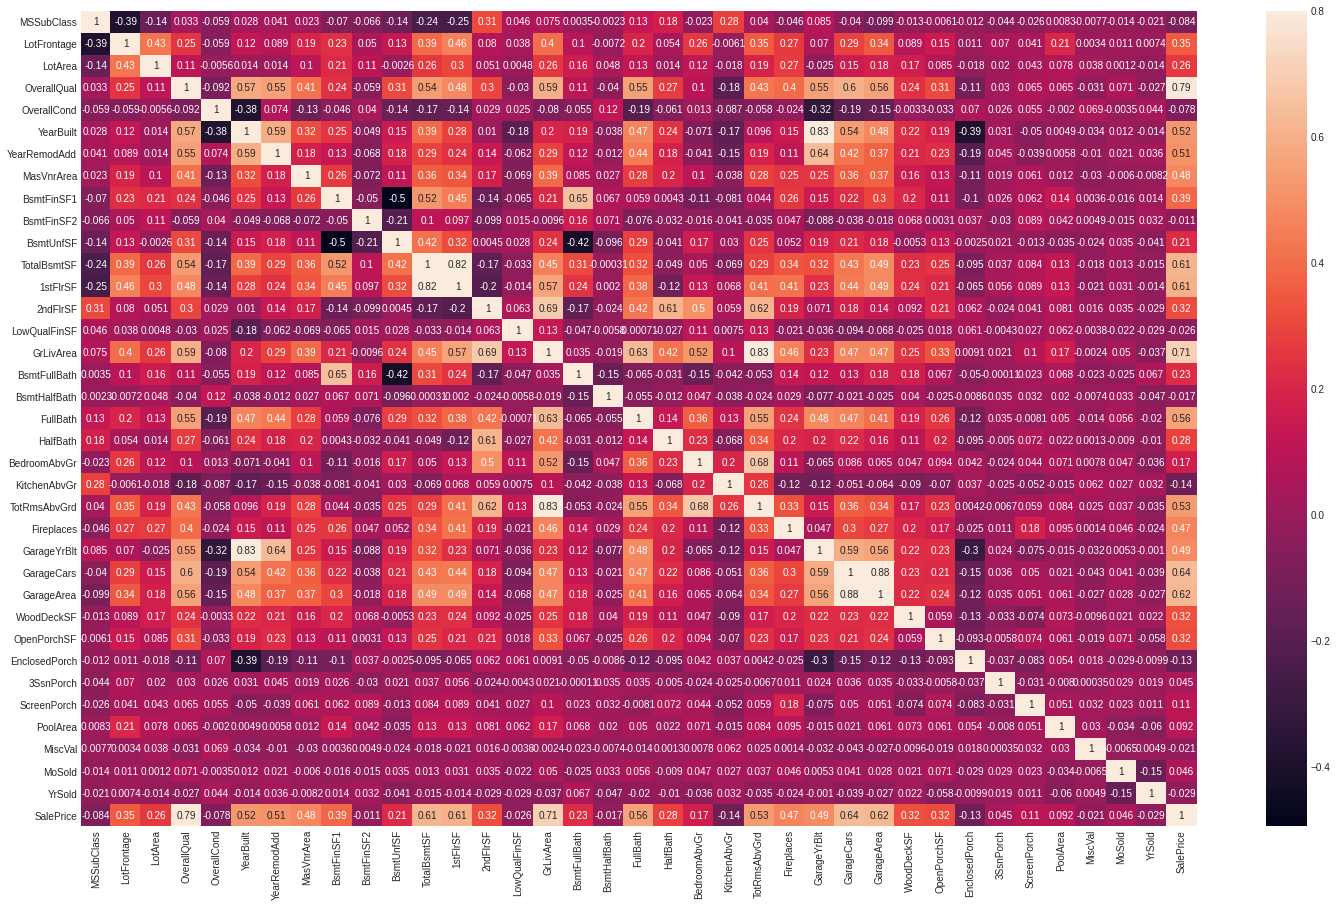

In [ ]:
#correlation matrix
# corrmat = train.corr()
# f, ax = plt.subplots(figsize=(25, 15))
# sns.heatmap(corrmat, vmax=.8, annot=True);

Generally speaking, a Pearson Correlation Coefficient of .5 is moderately positive. I'll filter the features by that metric.
![](http://intranet.tdmu.edu.ua/data/kafedra/internal/distance/classes_stud/english/1course/Medical%20statistics/08.%20Types%20of%20correlation.files/image013.gif)

[Text(0, 0.5, 'OverallQual'),
 Text(0, 1.5, 'YearBuilt'),
 Text(0, 2.5, 'YearRemodAdd'),
 Text(0, 3.5, 'TotalBsmtSF'),
 Text(0, 4.5, '1stFlrSF'),
 Text(0, 5.5, 'GrLivArea'),
 Text(0, 6.5, 'FullBath'),
 Text(0, 7.5, 'TotRmsAbvGrd'),
 Text(0, 8.5, 'GarageCars'),
 Text(0, 9.5, 'GarageArea'),
 Text(0, 10.5, 'SalePrice')]

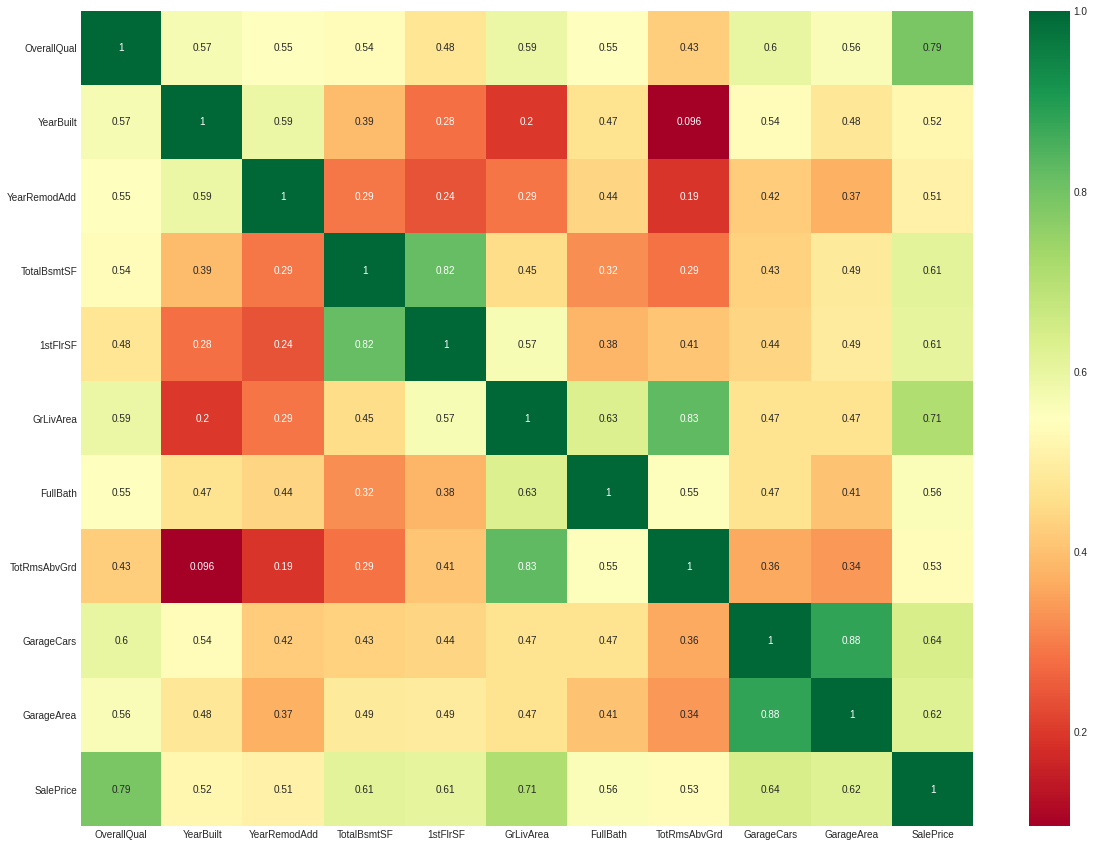

In [ ]:
# most correlated features
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(20,15))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
g.set_yticklabels(g.get_yticklabels(), rotation=360)

***

<a id='feature_engineering'></a>
### 4.2 - Feature engineering

This section is quite lengthy, so I have added hyperlinks to each subsection below in case you want to skip through...

- 4.2.1 - [Polynomials](#polynomials)
- 4.2.2 - [Interior](#interior)
- 4.2.3 - [Architectural & Structural](#architectural_&_structural)
- 4.2.4 - [Exterior](#exterior)
- 4.2.5 - [Location](#location)
- 4.2.6 - [Land](#land)
- 4.2.7 - [Access](#access)
- 4.2.8 - [Utilities](#utilities)
- 4.2.9 - [Miscellaneous](#miscellaneous)

<a id='polynomials'></a>
#### 4.2.1 - Polynomials

The most common relationship we may think of between two variables, would be a straight line or a linear relationship. What this means is that if we increase the predictor by 1 unit, the response always increases by X units. However, not all data has a linear relationship and therefore it may be necessary for your model to fit the more complex relationships in the data. 

But how do you fit a model to data with complex relationships, unexplainable by a linear function? There are a variety of curve-fitting methods you can choose from to help you with this.

- The most common way to fit curves to the data is to include polynomial terms, such as squared or cubed predictors.
- Typically, you choose the model order by the number of bends you need in your line. Each increase in the exponent produces one more bend in the curved fitted line. It’s very rare to use more than a cubic term.

Using the correlation matrix, the top influencing factors that I will use to create polynomials are:
1. **OverallQual**
2. **GrLivArea**
3. **GarageCars**
4. **GarageArea**
5. **TotalBsmtSF**
6. **1stFlrSF**
7. **FullBath**
8. **TotRmsAbvGrd**
9. **YearBuilt**
10. **YearRemodAdd**


In [ ]:
# Quadratic
all["OverallQual-2"] = all["OverallQual"] ** 2
all["GrLivArea-2"] = all["GrLivArea"] ** 2
all["GarageCars-2"] = all["GarageCars"] ** 2
all["GarageArea-2"] = all["GarageArea"] ** 2
all["TotalBsmtSF-2"] = all["TotalBsmtSF"] ** 2
all["1stFlrSF-2"] = all["1stFlrSF"] ** 2
all["FullBath-2"] = all["FullBath"] ** 2
all["TotRmsAbvGrd-2"] = all["TotRmsAbvGrd"] ** 2
all["YearBuilt-2"] = all["YearBuilt"] ** 2
all["YearRemodAdd-2"] = all["YearRemodAdd"] ** 2
print("Quadratics done!...")

# Cubic
all["OverallQual-3"] = all["OverallQual"] ** 3
all["GrLivArea-3"] = all["GrLivArea"] ** 3
all["GarageCars-3"] = all["GarageCars"] ** 3
all["GarageArea-3"] = all["GarageArea"] ** 3
all["TotalBsmtSF-3"] = all["TotalBsmtSF"] ** 3
all["1stFlrSF-3"] = all["1stFlrSF"] ** 3
all["FullBath-3"] = all["FullBath"] ** 3
all["TotRmsAbvGrd-3"] = all["TotRmsAbvGrd"] ** 3
all["YearBuilt-3"] = all["YearBuilt"] ** 3
all["YearRemodAdd-3"] = all["YearRemodAdd"] ** 3
print("Cubics done!...")

# Square Root
all["OverallQual-Sq"] = np.sqrt(all["OverallQual"])
all["GrLivArea-Sq"] = np.sqrt(all["GrLivArea"])
all["GarageCars-Sq"] = np.sqrt(all["GarageCars"])
all["GarageArea-Sq"] = np.sqrt(all["GarageArea"])
all["TotalBsmtSF-Sq"] = np.sqrt(all["TotalBsmtSF"])
all["1stFlrSF-Sq"] = np.sqrt(all["1stFlrSF"])
all["FullBath-Sq"] = np.sqrt(all["FullBath"])
all["TotRmsAbvGrd-Sq"] = np.sqrt(all["TotRmsAbvGrd"])
all["YearBuilt-Sq"] = np.sqrt(all["YearBuilt"])
all["YearRemodAdd-Sq"] = np.sqrt(all["YearRemodAdd"])
print("Roots done!...")
print('\n', '-' * 136)
print(all.shape)

<a id='interior'></a>
#### 4.2.2 - Interior

***BsmtQual***

- Evaluates the height of the basement.
       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches)
       NA	No Basement

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtQual", y="SalePrice", data=train, order=['Fa', 'TA', 'Gd', 'Ex']);

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtQual", y="SalePrice", data=train, size = 5, jitter = True, order=['Fa', 'TA', 'Gd', 'Ex']);

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtQual", y="SalePrice", data=train, order=['Fa', 'TA', 'Gd', 'Ex']);

SalePrice is clearly affected by BsmtQual with higher quality commanding a higher price. Since this feature is ordinal, I'll encode it myself.

In [ ]:
all['BsmtQual'] = all['BsmtQual'].map({"None":0, "Fa":1, "TA":2, "Gd":3, "Ex":4})
print(all.shape)
print('\n', '-' * 136)
all['BsmtQual'].unique()

***BsmtCond***
- Evaluates the general condition of the basement.
       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtCond", y="SalePrice", data=train, order=['Po', 'Fa', 'TA', 'Gd']);

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtCond", y="SalePrice", data=train, size = 5, jitter = True, order=['Po', 'Fa', 'TA', 'Gd']);

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtCond", y="SalePrice", data=train, order=['Po', 'Fa', 'TA', 'Gd']);

As basement quality improves, Saleprice increases. However, we see some very high prices in the "typical" category, while also being where the majority of data lies. This is an ordinal feature so I will replace by hand.

In [ ]:
all['BsmtCond'] = all['BsmtCond'].map({"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
print(all.shape)
print('\n', '-' * 136)
all['BsmtCond'].unique()

***BsmtExposure***
- Refers to walkout or garden level walls
       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtExposure", y="SalePrice", data=train, order=['No', 'Mn', 'Av', 'Gd']);

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtExposure", y="SalePrice", data=train, size = 5, jitter = True, order=['No', 'Mn', 'Av', 'Gd']);

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtExposure", y="SalePrice", data=train, order=['No', 'Mn', 'Av', 'Gd']);

SalePrice slightly increases as the amount of exposure increases. However, the average price between categories doesn't have much difference. Because these are ordinal, I will replace these values by hand. 

***BsmtFinType1***
- Rating of basement finished area
       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtFinType1", y="SalePrice", data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtFinType1", y="SalePrice", data=train, size = 5, jitter = True, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtFinType1", y="SalePrice", data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = mycols);

This is interesting as houses with an unfinished basement tended to have an average SalePrice higher than all finished basements except the highest quality finished basement. This is supposed to be an ordinal feature, but because SalePrice does not increase amongst all categories, I will creae dummy variables instead.

In [ ]:
all = pd.get_dummies(all, columns = ["BsmtFinType1"], prefix="BsmtFinType1")
print(all.shape)
print('\n', '-' * 136)
all.head(3)

***BsmtFinSF1***
- Type 1 finished square feet.

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['BsmtFinSF1'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['BsmtFinSF1'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="BsmtFinSF1", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="BsmtFinSF1", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="BsmtFinSF1", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="BsmtFinSF1", data=train, palette = mycols);


The reason for binning continuous features: [Binning](https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b)

BsmtFinSF1 has a positive correlation with SalePrice but the spread of the data is huge and varies depending on Neighborhood, BldgType, HouseStyle, and LotShape. I will bin this data into four quantiles.

In [ ]:
all['BsmtFinSF1_Band'] = pd.cut(all['BsmtFinSF1'], 4)
all['BsmtFinSF1_Band'].unique()

In [ ]:
all.loc[all['BsmtFinSF1']<=1002.5, 'BsmtFinSF1'] = 1
all.loc[(all['BsmtFinSF1']>1002.5) & (all['BsmtFinSF1']<=2005), 'BsmtFinSF1'] = 2
all.loc[(all['BsmtFinSF1']>2005) & (all['BsmtFinSF1']<=3007.5), 'BsmtFinSF1'] = 3
all.loc[all['BsmtFinSF1']>3007.5, 'BsmtFinSF1'] = 4
all['BsmtFinSF1'] = all['BsmtFinSF1'].astype(int)

all.drop('BsmtFinSF1_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["BsmtFinSF1"], prefix="BsmtFinSF1")
all.head(3)

***BsmtFinType2***
- Rating of basement finished area (if multiple types)
BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtFinType2", y="SalePrice", data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtFinType2", y="SalePrice", data=train, size = 5, jitter = True, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtFinType2", y="SalePrice", data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = mycols);

Most of the houses have unfinished second basements, and relatively few for the other categories. Although, this is meant to be an ordinal feature, I will create dummy variables.

In [ ]:
all_data = pd.get_dummies(all_data, columns = ["BsmtFinType2"], prefix="BsmtFinType2")
all_data.head(3)

***BsmtFinSF2***
- Type 2 finished square feet.

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['BsmtFinSF2'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['BsmtFinSF2'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="BsmtFinSF2", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="BsmtFinSF2", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="BsmtFinSF2", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="BsmtFinSF2", data=train, palette = mycols);

Most of the values, for this feature, are zero. There does not seem to be a significant correlation, so I will flag this variable.

In [ ]:
all_data['BsmtFinSf2_Flag'] = all_data['BsmtFinSF2'].map(lambda x:0 if x==0 else 1)
all_data.drop('BsmtFinSF2', axis=1, inplace=True)

***BsmtUnfSF***
- Unfinished square feet of basement area

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['BsmtUnfSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['BsmtUnfSF'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="BsmtUnfSF", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="BsmtUnfSF", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="BsmtUnfSF", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="BsmtUnfSF", data=train, palette = mycols);

This feature has positive correlation with SalePrice, with a proportion of data points equaling zero. The amount of square feet varies widely based on location and style, but is fairly consistent across lot shapes. I will create three bins.

In [ ]:
all['BsmtUnfSF_Band'] = pd.cut(all['BsmtUnfSF'], 3)
all['BsmtUnfSF_Band'].unique()

In [ ]:
all.loc[all['BsmtUnfSF']<=778.667, 'BsmtUnfSF'] = 1
all.loc[(all['BsmtUnfSF']>778.667) & (all['BsmtUnfSF']<=1557.333), 'BsmtUnfSF'] = 2
all.loc[all['BsmtUnfSF']>1557.333, 'BsmtUnfSF'] = 3
all['BsmtUnfSF'] = all['BsmtUnfSF'].astype(int)

all.drop('BsmtUnfSF_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["BsmtUnfSF"], prefix="BsmtUnfSF")
all.head(3)

***TotalBsmtSF***
- Total square feet of basement area.

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['TotalBsmtSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['TotalBsmtSF'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="TotalBsmtSF", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="TotalBsmtSF", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="TotalBsmtSF", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="TotalBsmtSF", data=train, palette = mycols);

This feature has a high correlation with Salesprice. It varies widely based on location but less so with type, style, and lot shape. I will cut this continuous variable into ten bins.

- This will be a very important feature within my analysis, due to such a high correlation with Saleprice.
- We can see that it varies widely based on location, however the average basement size has a lower variance based on type, style and lot shape.
- Due to this being a continuous numeric feature and also being a very significant feature when describing SalePrice, I believe there could be more value to be mined within this feature. Hence, I will create some binnings and dummy variables. 

In [ ]:
all['TotalBsmtSF_Band'] = pd.cut(all['TotalBsmtSF'], 10)
all['TotalBsmtSF_Band'].unique()

In [ ]:
all.loc[all['TotalBsmtSF']<=509.5, 'TotalBsmtSF'] = 1
all.loc[(all['TotalBsmtSF']>509.5) & (all['TotalBsmtSF']<=1019), 'TotalBsmtSF'] = 2
all.loc[(all['TotalBsmtSF']>1019) & (all['TotalBsmtSF']<=1528.5), 'TotalBsmtSF'] = 3
all.loc[(all['TotalBsmtSF']>1528.5) & (all['TotalBsmtSF']<=2038), 'TotalBsmtSF'] = 4
all.loc[(all['TotalBsmtSF']>2038) & (all['TotalBsmtSF']<=2547.5), 'TotalBsmtSF'] = 5
all.loc[(all['TotalBsmtSF']>2547.5) & (all['TotalBsmtSF']<=3057), 'TotalBsmtSF'] = 6
all.loc[(all['TotalBsmtSF']>3057) & (all['TotalBsmtSF']<=3566.5), 'TotalBsmtSF'] = 7
all.loc[all['TotalBsmtSF']>3566.5, 'TotalBsmtSF'] = 8
all['TotalBsmtSF'] = all['TotalBsmtSF'].astype(int)

all.drop('TotalBsmtSF_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["TotalBsmtSF"], prefix="TotalBsmtSF")
all.head(3)

***1stFlrSF***
- First floor square feet.

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['1stFlrSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['1stFlrSF'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="1stFlrSF", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="1stFlrSF", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="1stFlrSF", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="1stFlrSF", data=train, palette = mycols);

This feature is important because it has high positive correlation with SalePrice. It varies greatly across neighborhoods, building types, and styles. It does not vary much between lot styles. Because it is continuous, I will turn it into six equal bins.

In [ ]:
all['1stFlrSF_Band'] = pd.cut(all['1stFlrSF'], 6)
all['1stFlrSF_Band'].unique()

In [ ]:
all.loc[all['1stFlrSF']<=1127.5, '1stFlrSF'] = 1
all.loc[(all['1stFlrSF']>1127.5) & (all['1stFlrSF']<=1921), '1stFlrSF'] = 2
all.loc[(all['1stFlrSF']>1921) & (all['1stFlrSF']<=2714.5), '1stFlrSF'] = 3
all.loc[(all['1stFlrSF']>2714.5) & (all['1stFlrSF']<=3508), '1stFlrSF'] = 4
all.loc[(all['1stFlrSF']>3508) & (all['1stFlrSF']<=4301.5), '1stFlrSF'] = 5
all.loc[all['1stFlrSF']>4301.5, '1stFlrSF'] = 6
all['1stFlrSF'] = all['1stFlrSF'].astype(int)

all.drop('1stFlrSF_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["1stFlrSF"], prefix="1stFlrSF")
all.head(3)

***2ndFlrSF***
- Second floor square feet.

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['2ndFlrSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['2ndFlrSF'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="2ndFlrSF", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="2ndFlrSF", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="2ndFlrSF", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="2ndFlrSF", data=train, palette = mycols);

There is a positive correlation with SalePrice, but it also has a significant number of houses with value = 0. The reason for this could be because not all homes have more than "1Story." Also, there is variation between BldgType, LotShap, and Neighborhood. Because it is continuous, I will cut it into six bins.

In [ ]:
all['2ndFlrSF_Band'] = pd.cut(all['2ndFlrSF'], 6)
all['2ndFlrSF_Band'].unique()

In [ ]:
all.loc[all['2ndFlrSF']<=310.333, '2ndFlrSF'] = 1
all.loc[(all['2ndFlrSF']>310.333) & (all['2ndFlrSF']<=620.667), '2ndFlrSF'] = 2
all.loc[(all['2ndFlrSF']>620.667) & (all['2ndFlrSF']<=931), '2ndFlrSF'] = 3
all.loc[(all['2ndFlrSF']>931) & (all['2ndFlrSF']<=1241.333), '2ndFlrSF'] = 4
all.loc[(all['2ndFlrSF']>1241.333) & (all['2ndFlrSF']<=1551.667), '2ndFlrSF'] = 5
all.loc[all['2ndFlrSF']>1551.667, '2ndFlrSF'] = 6
all['2ndFlrSF'] = all['2ndFlrSF'].astype(int)

all.drop('2ndFlrSF_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["2ndFlrSF"], prefix="2ndFlrSF")
all.head(3)

***LowQualFinSF***
- Low quality finished square feet (all floors)

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['LowQualFinSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['LowQualFinSF'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="LowQualFinSF", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="LowQualFinSF", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="LowQualFinSF", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="LowQualFinSF", data=train, palette = mycols);

There are a large number of properties with a value of zero, and very few for anything else. I will flag this continuous variable.

In [ ]:
all['LowQualFinSF_Flag'] = all['LowQualFinSF'].map(lambda x:0 if x==0 else 1)
all.drop('LowQualFinSF', axis=1, inplace=True)

***BsmtHalfBath***, ***BsmtFullBath***, ***HalfBath***, ***FullBath***

- Number of bathrooms.

I just summed these variables to get the total amount of bathrooms.

In [ ]:
all['TotalBathrooms'] = all['BsmtHalfBath'] + all['BsmtFullBath'] + all['HalfBath'] + all['FullBath']

columns = ['BsmtHalfBath', 'BsmtFullBath', 'HalfBath', 'FullBath']
all.drop(columns, axis=1, inplace=True)

***Bedroom***
- Bedrooms above grade (does not include basement bedrooms)

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BedroomAbvGr", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="BedroomAbvGr", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="BedroomAbvGr", y="SalePrice", data=train, palette = mycols);

- We see a lot of houses with 2 3 and 4 bedrooms above ground, and a very low number of houses with 6 or above.
- Since this is a continuous numeric feature, I will leave it how it is.

***Kitchen***
- Kitchens above grade.

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="KitchenAbvGr", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="KitchenAbvGr", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="KitchenAbvGr", y="SalePrice", data=train, palette = mycols);

- Similarly to last previous feature, we see just a small number of houses with a large number of kitchens above grade. This shows that most houses have 1 kitchen above grade.
- Since this is a continuous numeric feature, I will leave it as it is.

***KitchenQual***
- Kitchen quality.
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor


In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="KitchenQual", y="SalePrice", data=train, order=["Fa", "TA", "Gd", "Ex"], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="KitchenQual", y="SalePrice", data=train, size = 5, jitter = True, order=["Fa", "TA", "Gd", "Ex"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="KitchenQual", y="SalePrice", data=train, order=["Fa", "TA", "Gd", "Ex"], palette = mycols);

There is a clear positive correlation between SalePrice and KitchenQual. These values are ordinal so I will replace them by hand.

In [ ]:
all['KitchenQual'] = all['KitchenQual'].map({"Fa":1, "TA":2, "Gd":3, "Ex":4})
all['KitchenQual'].unique()

***TotRmsAbvGrd***
- Total rooms above grade (does not include bathrooms)

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="TotRmsAbvGrd", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="TotRmsAbvGrd", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="TotRmsAbvGrd", y="SalePrice", data=train, palette = mycols);

There is a positive correlation between SalePrice and the number of rooms. However, most of the data is concentrated around the middle points so the extreme high and low values are less reliable. I will leave this continuous feature as is.

***Fireplaces***
- Number of fireplaces.

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Fireplaces", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Fireplaces", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Fireplaces", y="SalePrice", data=train, palette = mycols);

There is a positive correlation between SalePrice and the number of fire places, but most homes either have 1 or no fire places. I will leave this continuous feature as is.

***FireplaceQu***
- Fireplace quality.
       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="FireplaceQu", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="FireplaceQu", y="SalePrice", data=train, size = 5, jitter = True, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="FireplaceQu", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

There is a positive correlation between SalePrice and the quality of the fireplace, and most houses either have Average or Fair quality fireplaces. Because this is an ordinal feature, I will replace the values by hand.

In [ ]:
all_data['FireplaceQu'] = all_data['FireplaceQu'].map({"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
all_data['FireplaceQu'].unique()

***GrLivArea***
- Above grade ground living area in square feet.

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['GrLivArea'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="GrLivArea", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="GrLivArea", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="GrLivArea", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="GrLivArea", data=train, palette = mycols);

There is a high positive correlation between between SalePrice and the amount of living area above grade. It also varies between BldgType, HouseStyle, LotShape, and Neighborhood. Because this feature is continuous, I will cut it into six bins.

In [ ]:
all['GrLivArea_Band'] = pd.cut(all['GrLivArea'], 6)
all['GrLivArea_Band'].unique()

In [ ]:
all.loc[all['GrLivArea']<=1127.5, 'GrLivArea'] = 1
all.loc[(all['GrLivArea']>1127.5) & (all['GrLivArea']<=1921), 'GrLivArea'] = 2
all.loc[(all['GrLivArea']>1921) & (all['GrLivArea']<=2714.5), 'GrLivArea'] = 3
all.loc[(all['GrLivArea']>2714.5) & (all['GrLivArea']<=3508), 'GrLivArea'] = 4
all.loc[(all['GrLivArea']>3508) & (all['GrLivArea']<=4301.5), 'GrLivArea'] = 5
all.loc[all['GrLivArea']>4301.5, 'GrLivArea'] = 6
all['GrLivArea'] = all['GrLivArea'].astype(int)

all.drop('GrLivArea_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["GrLivArea"], prefix="GrLivArea")
all.head(3)

<a id='architectural_&_structural'></a>
#### 4.2.3 - Architectural & Structural

***MSSubClass***
- Identifies the type of dwelling involved in the sale.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="MSSubClass", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="MSSubClass", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="MSSubClass", y="SalePrice", data=train, palette = mycols);

Each class represents a style of the building with the highest averages for 1 and 2 story homes built after 1946. There is also large variance between each class, and although it is a continuous variable, it actually should be categorical. I will create dummy variables.

In [ ]:
all['MSSubClass'] = all['MSSubClass'].astype(str)

all = pd.get_dummies(all, columns = ["MSSubClass"], prefix="MSSubClass").drop(columns=["MSSubClass"])
all.head(3)

***BldgType***
- Type of dwelling.

       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BldgType", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="BldgType", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="BldgType", y="SalePrice", data=train, palette = mycols);

The majority of the data fall within the "1Fam" category, and not much variance in the other categories. I will create dummy features.

In [ ]:
all_data['BldgType'] = all_data['BldgType'].astype(str)

all_data = pd.get_dummies(all_data, columns = ["BldgType"], prefix="BldgType").drop(columns = ["BldgType"])
all_data.head(3)

***HouseStyle***
- Style of dwelling.
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="HouseStyle", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="HouseStyle", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="HouseStyle", y="SalePrice", data=train, palette = mycols);

Most of the data belongs to both the 2Story and 1Story categories. There are also some extremes especially in the 2.5 level categories. I will cluster a few of these categories because some have so few values in it.

In [ ]:
all_data['HouseStyle'] = all_data['HouseStyle'].map({"2Story":"2Story", "1Story":"1Story", "1.5Fin":"1.5Story", "1.5Unf":"1.5Story", 
                                                     "SFoyer":"SFoyer", "SLvl":"SLvl", "2.5Unf":"2.5Story", "2.5Fin":"2.5Story"})

all_data = pd.get_dummies(all_data, columns = ["HouseStyle"], prefix="HouseStyle").drop(columns = ["HouseStyle"])
all_data.head(3)

***OverallQual***
- Rates the overall material and finish of the house.
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="OverallQual", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="OverallQual", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="OverallQual", y="SalePrice", data=train, palette = mycols);

This numeric feature is actually ordinal with SalePrice increasing as OverallQual increases. I will keep it as is. 

***OverallCond***
- Rates the overall condition of the house.
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="OverallCond", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="OverallCond", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="OverallCond", y="SalePrice", data=train, palette = mycols);

OverallCond is an ordinal feature despite it being numeric. It's interesting as the category 5 has the most number of data points and the highest median. I will leave it as is.

***YearRemodAdd***
- Remodel date (same as construction date if no remodeling or additions).

In [ ]:
plt.subplots(figsize =(30, 15))

plt.subplot(3, 1, 1)
sns.boxplot(x="YearRemodAdd", y="SalePrice", data=train, palette = mycols);

plt.subplot(3, 1, 2)
sns.stripplot(x="YearRemodAdd", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(3, 1, 3)
sns.barplot(x="YearRemodAdd", y="SalePrice", data=train, palette = mycols);

This feature shows that the newer the remodeling of a home, the higher the SalePrice. However, creating a new feature that takes the difference in number of years between remodeling and original construction might be a better feature.

In [ ]:
train['Remod_Diff'] = train['YearRemodAdd'] - train['YearBuilt']

plt.subplot(3, 1, 1)
sns.boxplot(x="Remod_Diff", y="SalePrice", data=train, palette = mycols);

plt.subplot(3, 1, 2)
sns.stripplot(x="Remod_Diff", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(3, 1, 3)
sns.barplot(x="Remod_Diff", y="SalePrice", data=train, palette = mycols);

This new feature does not show a strictly positive correlation between SalePrice and years between remodels. I will leave the variable as is and remove Remod_Diff

In [ ]:
all['Remod_Diff'] = all['YearRemodAdd'] - all['YearBuilt']

all.drop('YearRemodAdd', axis=1, inplace=True)

***YearBuilt***
- Original construction date.

In [ ]:
plt.subplots(figsize =(30, 15))

plt.subplot(3, 1, 1)
sns.boxplot(x="YearBuilt", y="SalePrice", data=train, palette = mycols);

plt.subplot(3, 1, 2)
sns.stripplot(x="YearBuilt", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(3, 1, 3)
sns.barplot(x="YearBuilt", y="SalePrice", data=train, palette = mycols);


As houses become more modern, I can see a fairly consistent positive trend. I will cut and bin this feature.

In [ ]:
all['YearBuilt_Band'] = pd.cut(all['YearBuilt'], 7)
all['YearBuilt_Band'].unique()

In [ ]:
all.loc[all['YearBuilt']<=1892, 'YearBuilt'] = 1
all.loc[(all['YearBuilt']>1892) & (all['YearBuilt']<=1911), 'YearBuilt'] = 2
all.loc[(all['YearBuilt']>1911) & (all['YearBuilt']<=1931), 'YearBuilt'] = 3
all.loc[(all['YearBuilt']>1931) & (all['YearBuilt']<=1951), 'YearBuilt'] = 4
all.loc[(all['YearBuilt']>1951) & (all['YearBuilt']<=1971), 'YearBuilt'] = 5
all.loc[(all['YearBuilt']>1971) & (all['YearBuilt']<=1990), 'YearBuilt'] = 6
all.loc[all['YearBuilt']>1990, 'YearBuilt'] = 7
all['YearBuilt'] = all['YearBuilt'].astype(int)

all.drop('YearBuilt_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["YearBuilt"], prefix="YearBuilt")
all.head(3)

***Foundation***
- Type of foundation.
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Foundation", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="Foundation", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Foundation", y="SalePrice", data=train, palette = mycols);

The first three classes contain most of the data while the last three are very sparse. I will not cluster the last three together because SalePrice's mean and median are too different from each other. I will create dummy variables for this feature.

In [ ]:
all = pd.get_dummies(all, columns = ["Foundation"], prefix="Foundation")
all.head(3)

***Functional***
- Home functionality.

***

Many of the features are correlated with each other.
OverallQual and GrLivArea are highly correlated with our target variable of SalePrice.

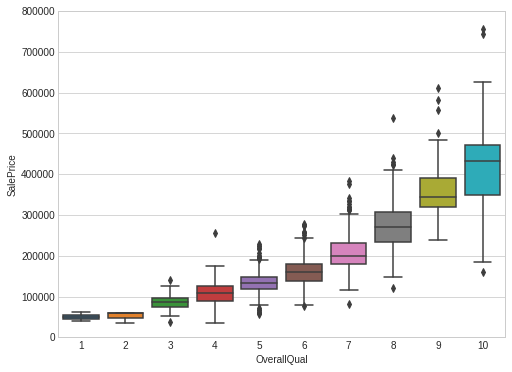

In [ ]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], all[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

There is definately an increasing relationship between SalePrice and OverallQual.

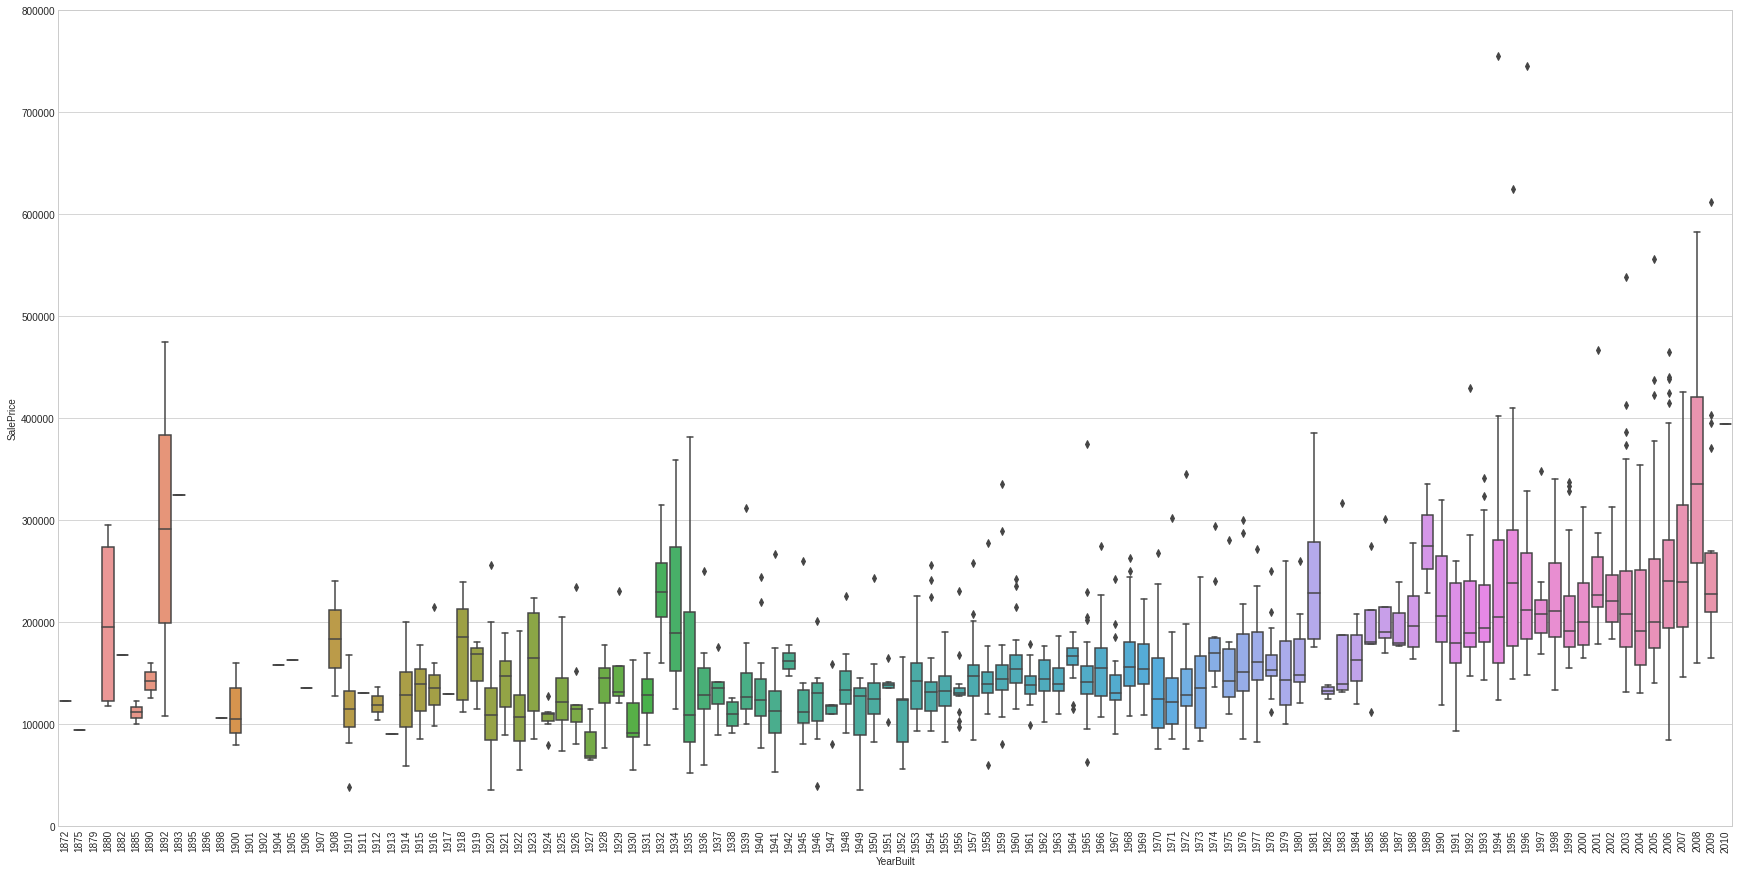

In [ ]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], all[var]], axis=1)
f, ax = plt.subplots(figsize=(30, 15))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

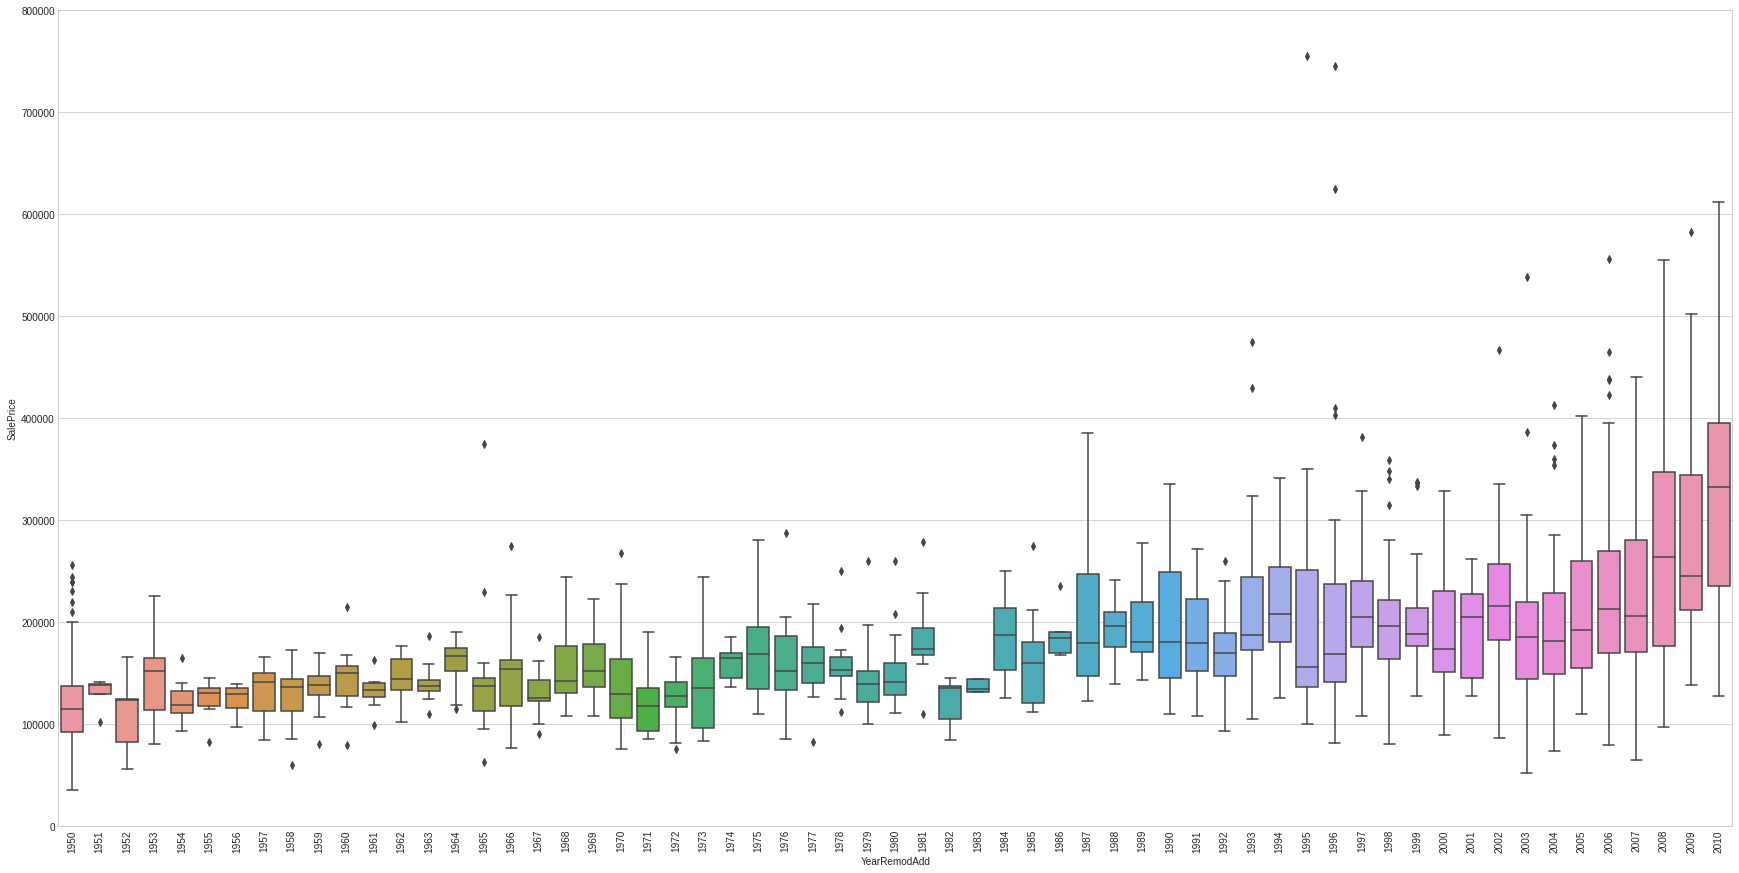

In [ ]:
var = 'YearRemodAdd'
data = pd.concat([train['SalePrice'], all[var]], axis=1)
f, ax = plt.subplots(figsize=(30, 15))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [ ]:
var = 'FullBath'
data = pd.concat([train['SalePrice'], all[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

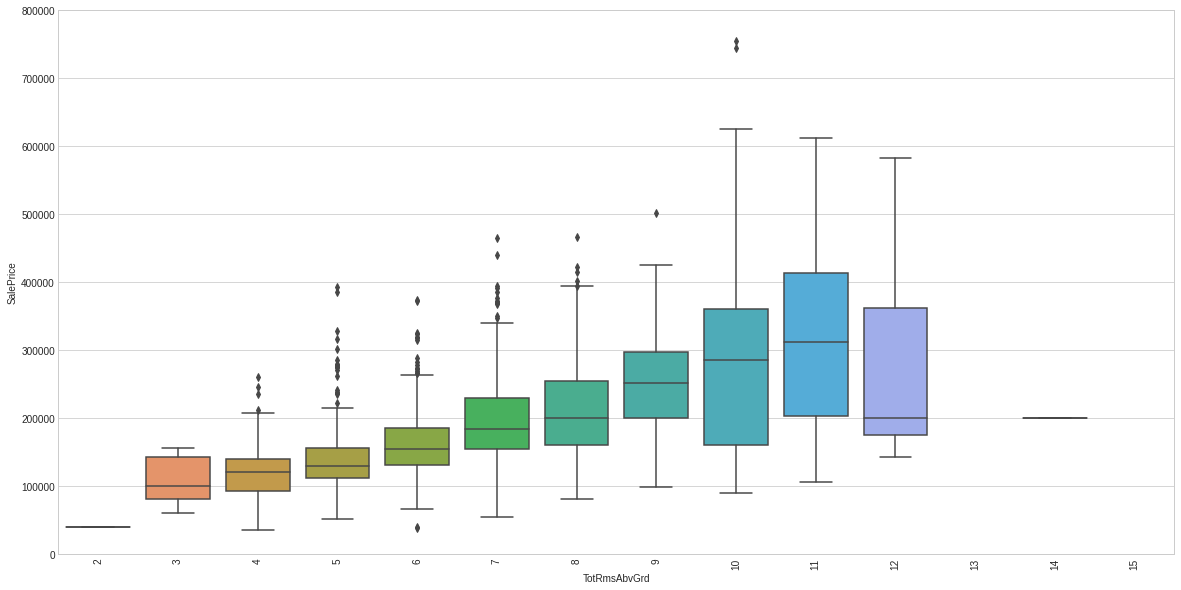

In [ ]:
var = 'TotRmsAbvGrd'
data = pd.concat([train['SalePrice'], all[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [ ]:
var = 'GarageCars'
data = pd.concat([train['SalePrice'], all[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [ ]:
numeric_features = train.select_dtypes(include=[np.number])
year_feature = [feature for feature in numeric_features if 'Yr' in feature or 'Year' in feature]
discrete_feature=[feature for feature in numeric_features if len(train[feature].unique())<25 and feature not in year_feature+['Id']]


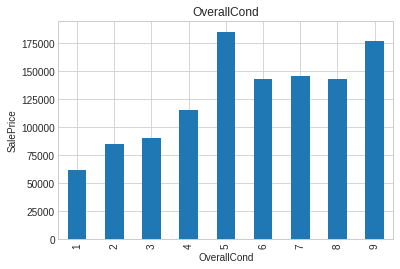

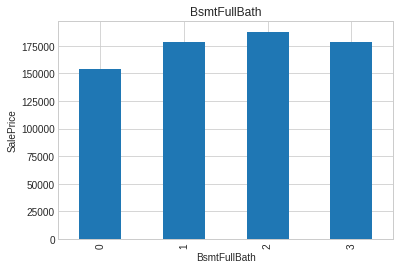

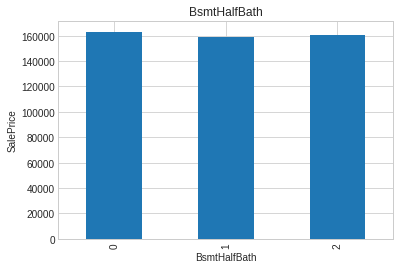

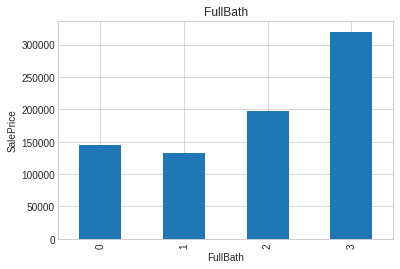

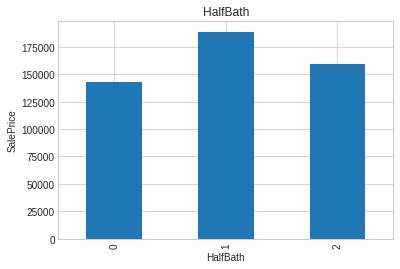

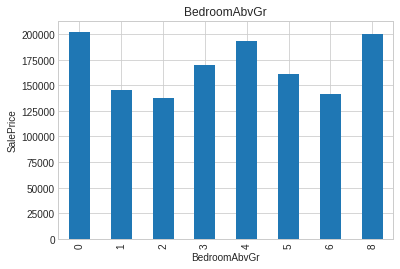

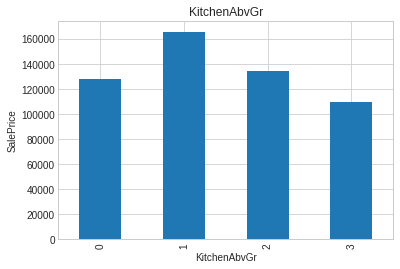

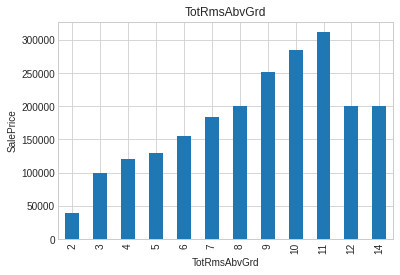

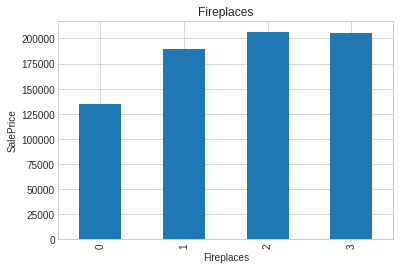

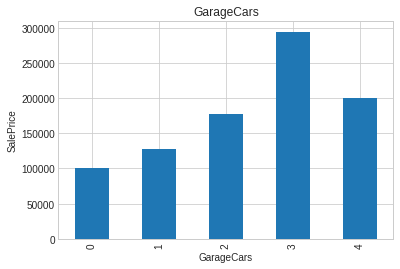

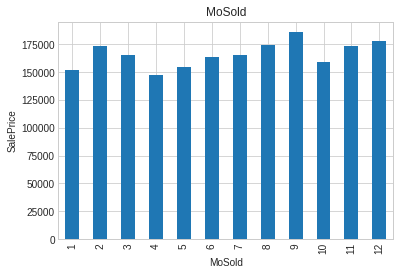

In [ ]:
for feature in discrete_feature:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [ ]:
data=train.copy()
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
g = sns.regplot(x=data['GrLivArea'], y=data['SalePrice'], fit_reg=False).set_title("Before")

# Delete outliers
plt.subplot(1, 2, 2)                                                                                
data = data.drop(data[(data['GrLivArea']>4000)].index)
g = sns.regplot(x=data['GrLivArea'], y=data['SalePrice'], fit_reg=False).set_title("After")

You can see how deleting the outliers (the 4 points above 4000 on the x-axis) makes the plot more focused.

EDA

***

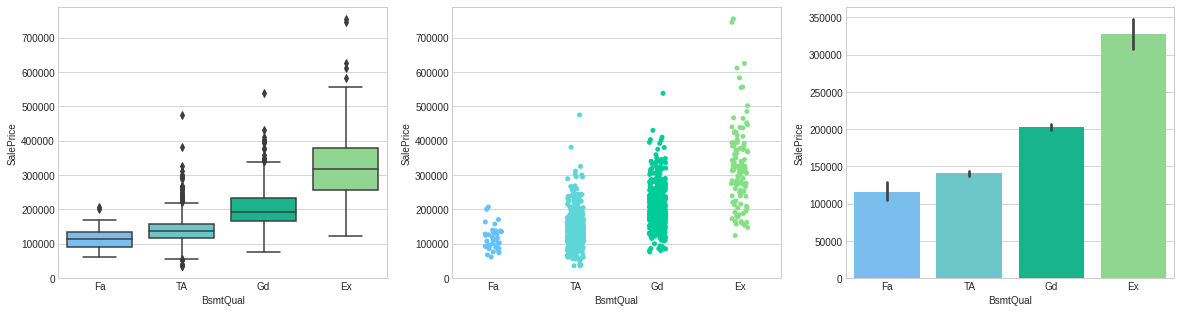

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtQual", y="SalePrice", data=train, palette = mycols, order=['Fa', 'TA', 'Gd', 'Ex']);

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtQual", y="SalePrice", data=train, palette = mycols, size = 5, jitter = True, order=['Fa', 'TA', 'Gd', 'Ex']);

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtQual", y="SalePrice", data=train, palette = mycols, order=['Fa', 'TA', 'Gd', 'Ex']);

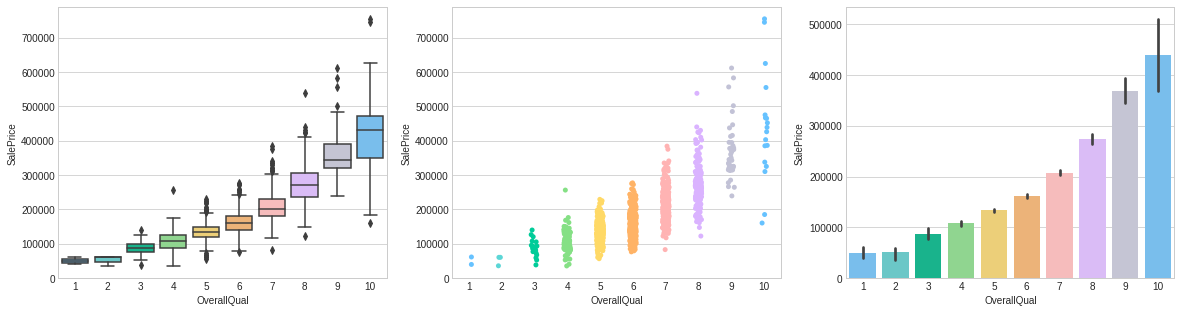

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="OverallQual", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="OverallQual", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="OverallQual", y="SalePrice", data=train, palette = mycols);

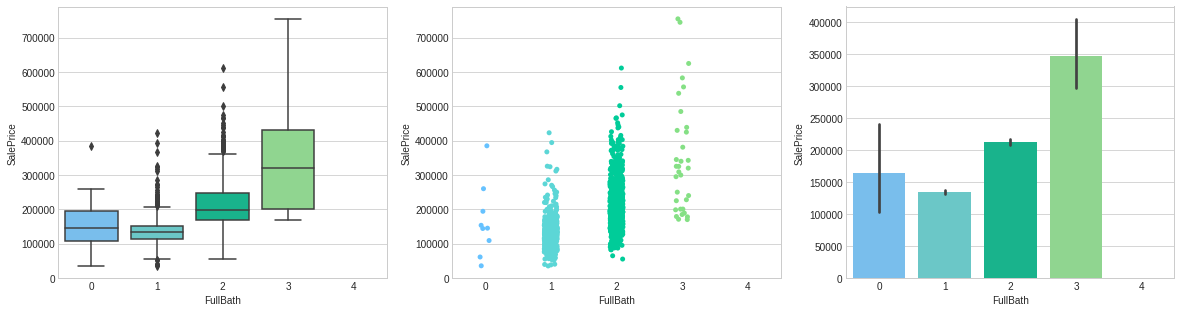

In [ ]:
var = 'FullBath'
data = pd.concat([train['SalePrice'], all[var]], axis=1)
# plt.subplots(figsize=(30, 30))
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=var, y="SalePrice", data=data, palette = mycols)
fig.axis(xmin=0, xmax=2);

plt.subplot(1, 3, 2)
sns.stripplot(x=var, y="SalePrice", data=data, size = 5, jitter = True, palette = mycols)
fig.axis(xmin=0, xmax=3);

plt.subplot(1, 3, 3)
sns.barplot(x=var, y="SalePrice", data=data, palette = mycols)
fig.axis(xmin=0, xmax=3);

In [ ]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], all[var]], axis=1)
plt.subplots(figsize=(30, 30))

plt.subplot(3, 1, 1)
sns.boxplot(x=var, y="SalePrice", data=data, palette = mycols)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);

plt.subplot(3, 1, 2)
sns.stripplot(x=var, y="SalePrice", data=data, size = 5, jitter = True, palette = mycols)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);

plt.subplot(3, 1, 3)
sns.barplot(x=var, y="SalePrice", data=data, palette = mycols)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);

There is an increasing relationship between Sales Price and the year it was built.

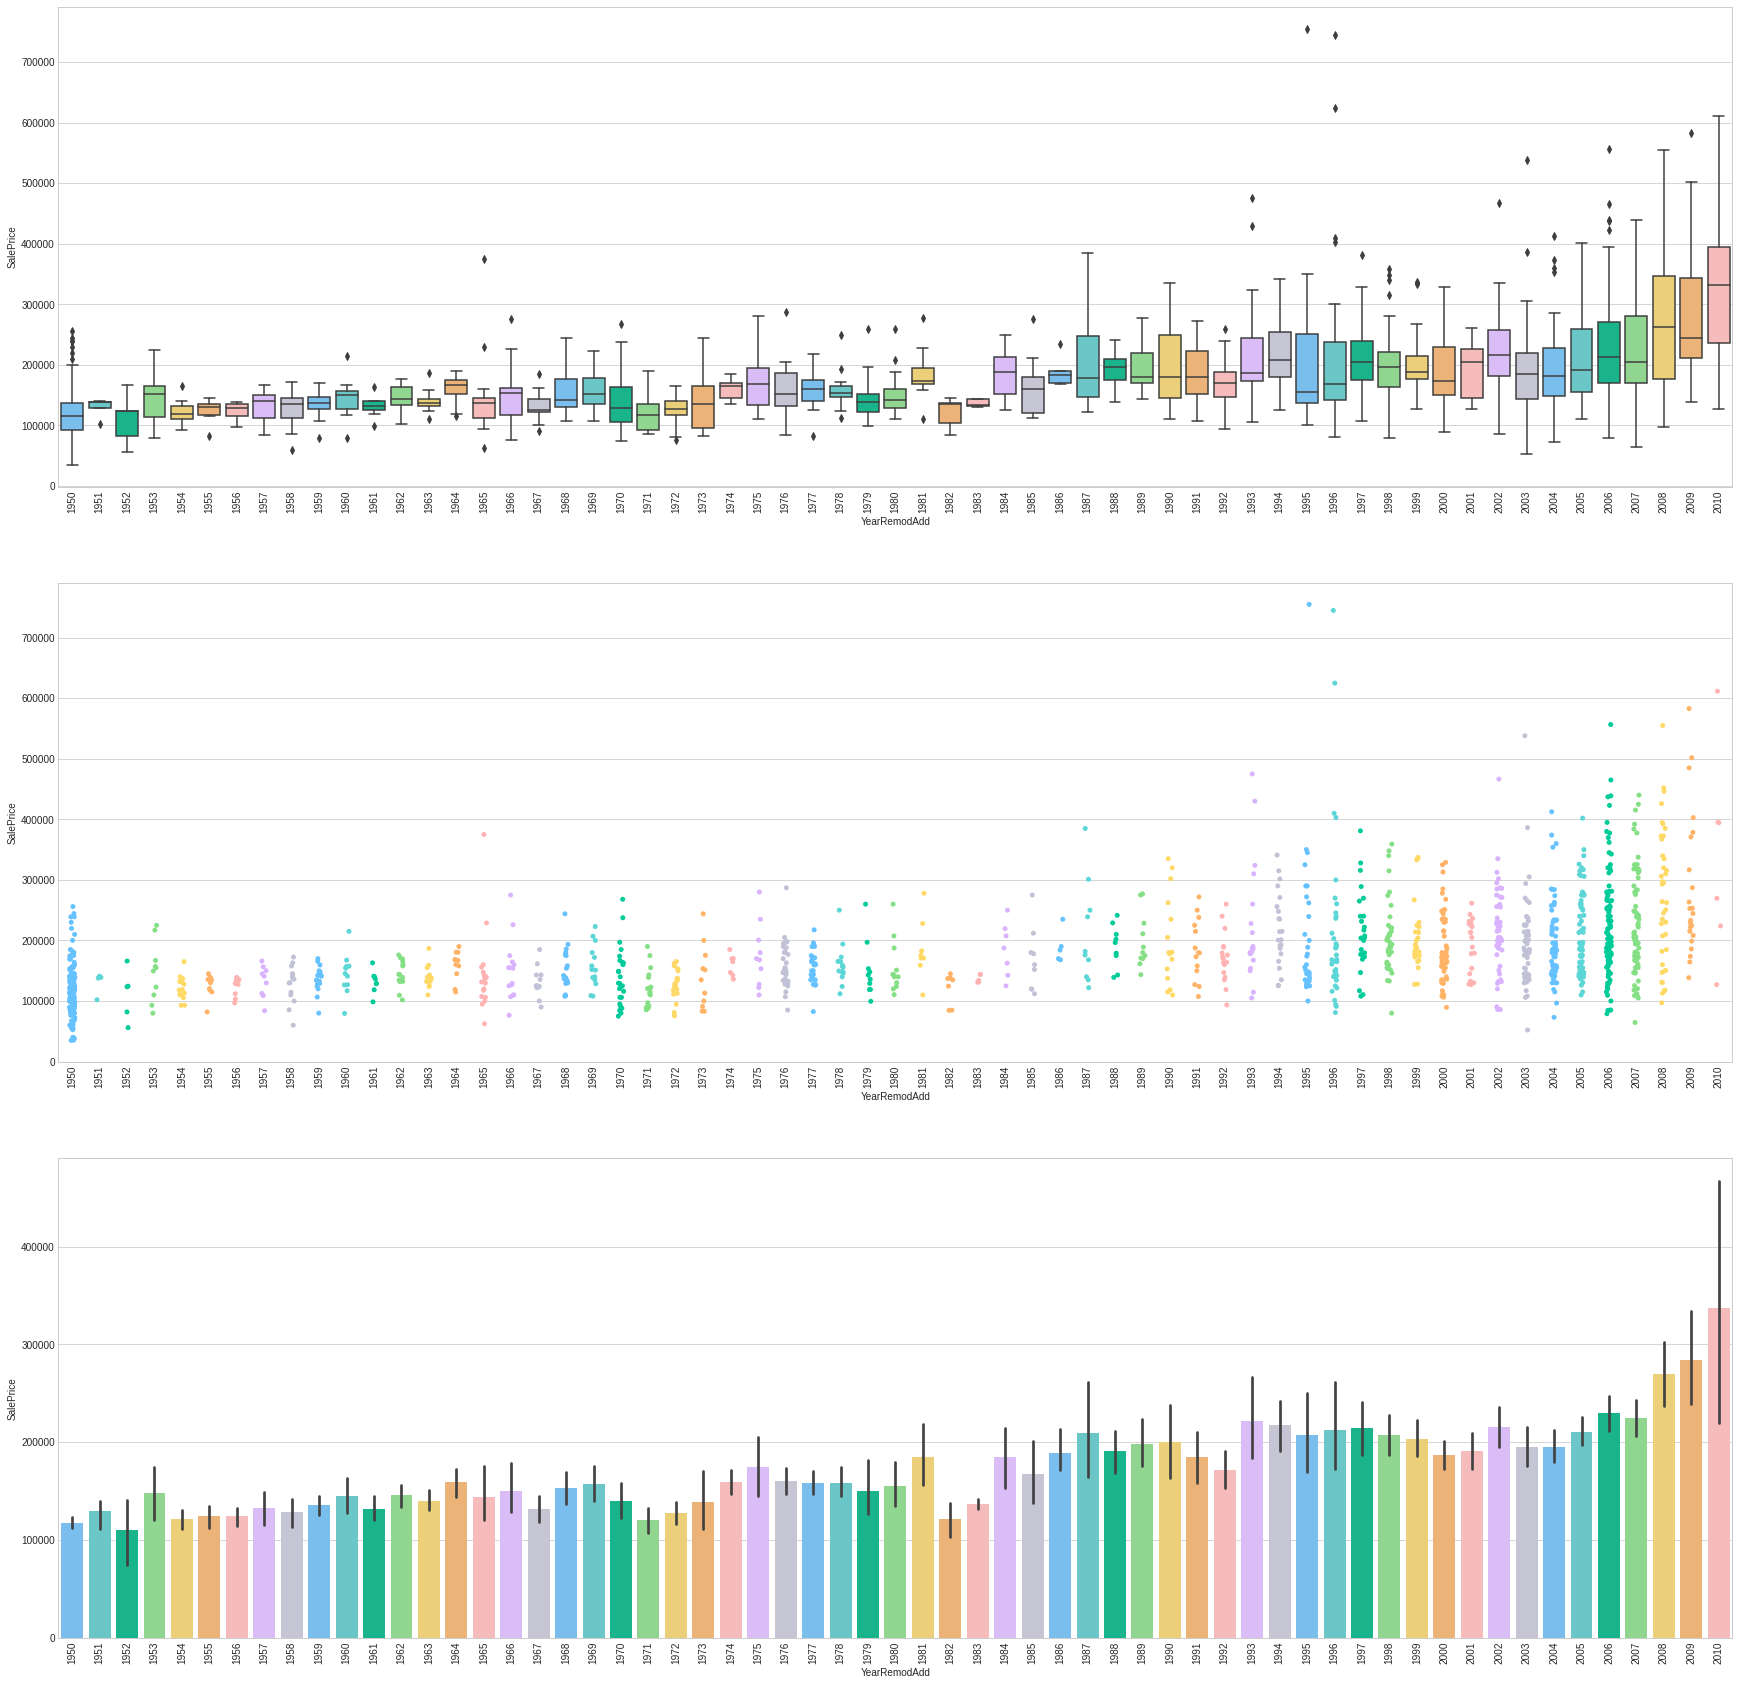

In [ ]:
var = 'YearRemodAdd'
data = pd.concat([train['SalePrice'], all[var]], axis=1)
plt.subplots(figsize=(30, 30))

plt.subplot(3, 1, 1)
sns.boxplot(x=var, y="SalePrice", data=data, palette = mycols)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);

plt.subplot(3, 1, 2)
sns.stripplot(x=var, y="SalePrice", data=data, size = 5, jitter = True, palette = mycols)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);

plt.subplot(3, 1, 3)
sns.barplot(x=var, y="SalePrice", data=data, palette = mycols)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['TotalBsmtSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['TotalBsmtSF'], 
                                                                                                           train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="TotalBsmtSF", data=train, palette = mycols);

# plt.subplot(grid[1, 0]);
# sns.barplot(x="BldgType", y="TotalBsmtSF", data=train, palette = mycols)

# plt.subplot(grid[1, 1]);
# sns.barplot(x="HouseStyle", y="TotalBsmtSF", data=train, palette = mycols)

# plt.subplot(grid[1, 2]);
# sns.barplot(x="LotShape", y="TotalBsmtSF", data=train, palette = mycols);

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['1stFlrSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['1stFlrSF'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="1stFlrSF", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="1stFlrSF", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="1stFlrSF", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="1stFlrSF", data=train, palette = mycols);

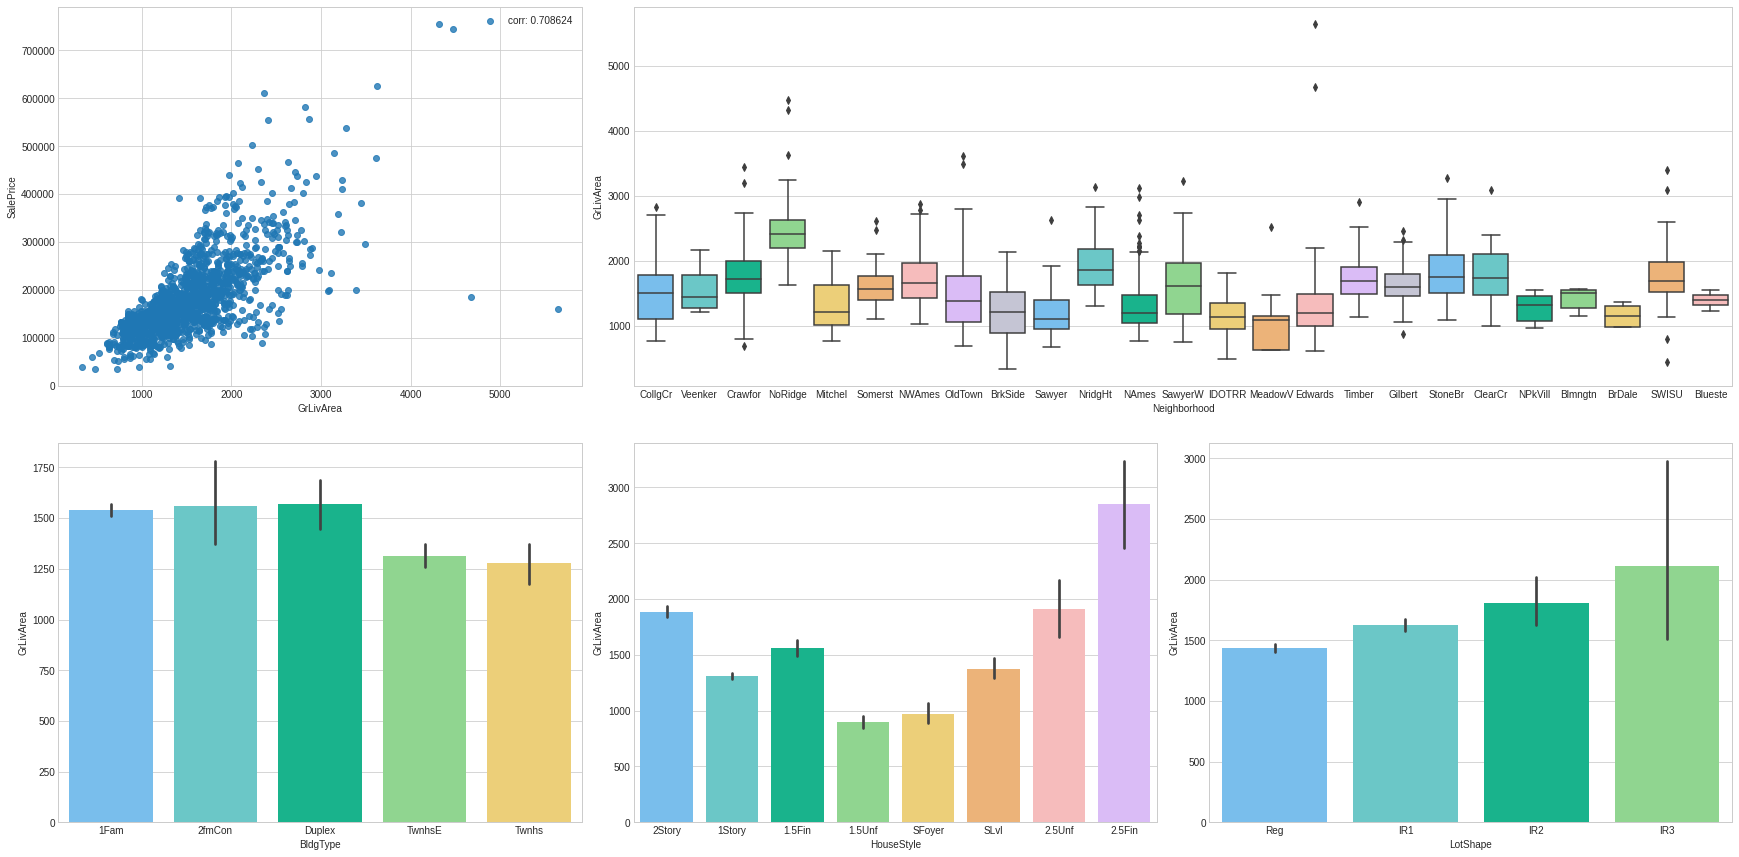

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['GrLivArea'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="GrLivArea", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="GrLivArea", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="GrLivArea", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="GrLivArea", data=train, palette = mycols);

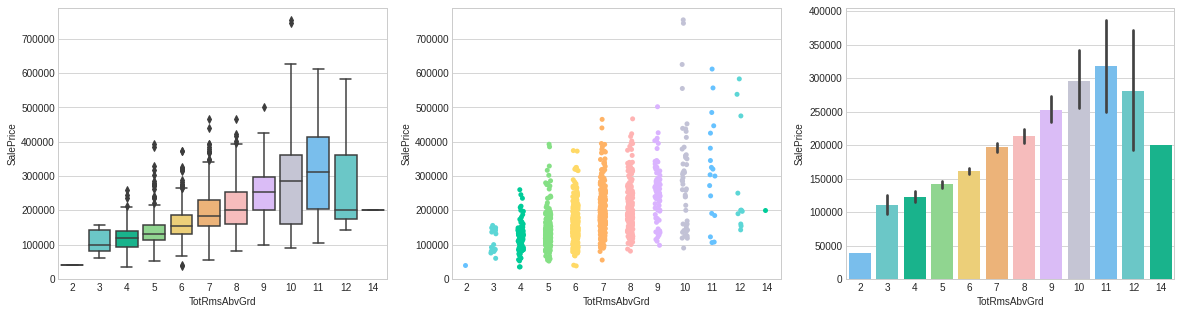

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="TotRmsAbvGrd", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="TotRmsAbvGrd", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="TotRmsAbvGrd", y="SalePrice", data=train, palette = mycols);

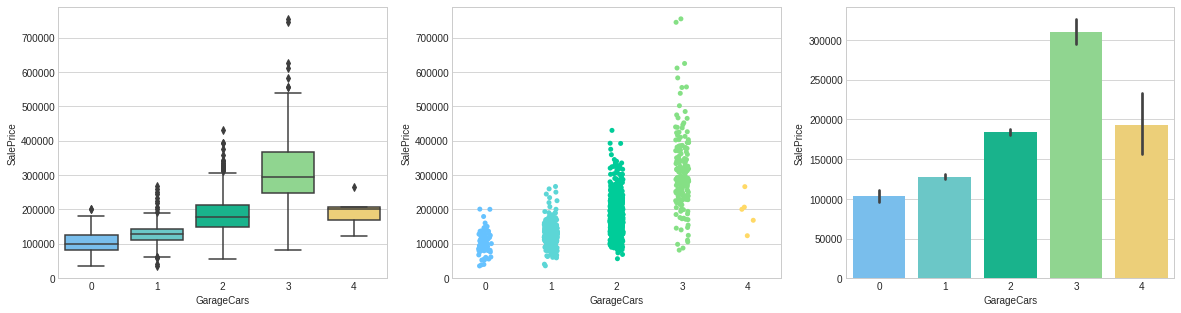

In [ ]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="GarageCars", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="GarageCars", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="GarageCars", y="SalePrice", data=train, palette = mycols);

In [ ]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['GarageArea'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['GarageArea'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="GarageArea", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="GarageArea", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="GarageArea", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="GarageArea", data=train, palette = mycols);


 mu = 180921.20 and sigma = 79415.29



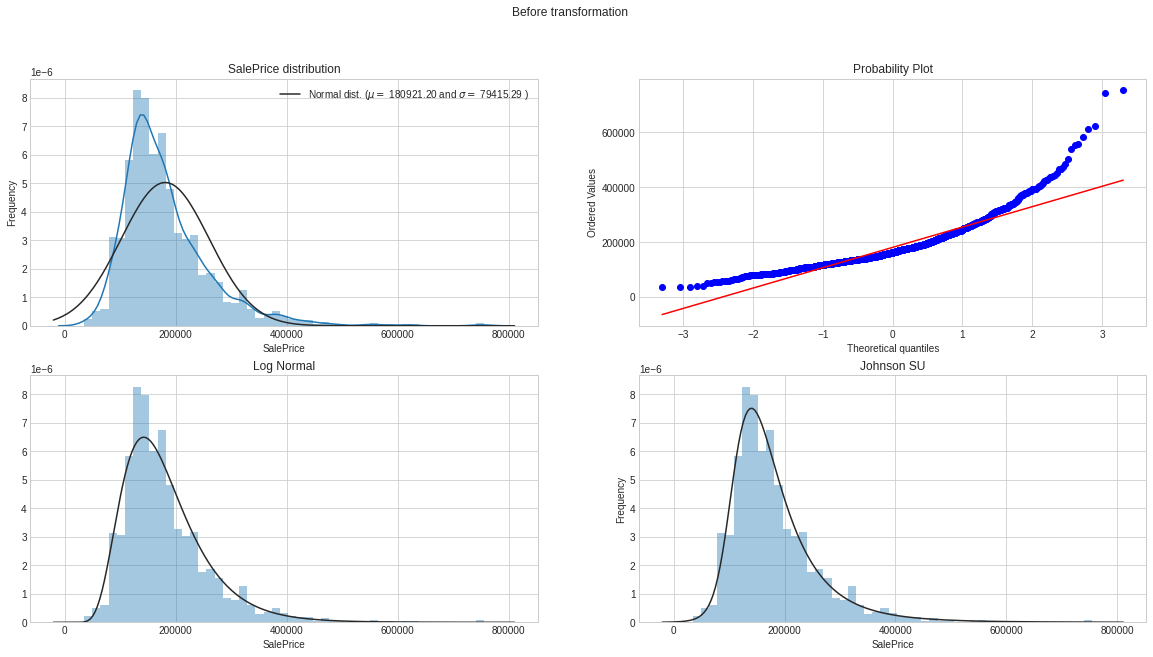

In [ ]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

y = train['SalePrice']
fig = plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.distplot(train['SalePrice'] , fit=norm);


# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

plt.subplot(2,2,2)
res = stats.probplot(train['SalePrice'], plot=plt)
plt.suptitle('Before transformation')

plt.subplot(2,2,3)
plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

plt.subplot(2,2,4)
plt.title('Johnson SU')
plt.ylabel('Frequency')
sns.distplot(y, kde=False, fit=stats.johnsonsu)

The 4 distributions explain SalesPrice. It is skewed to the right. In the top left distribution, the black line represents the theoretical normal distribution which does not fit the data. The blue line is the KDE and here is a helpful link: [Intro to KDE](https://machinelearningmastery.com/probability-density-estimation/)

Before we can predict the SalesPrice, we need to transform the data. The black lines are the different distributions which would "fit" the data upon transformation.

The top right is a QQ plot which is another visualization which helps to see if the distribution is normal. If it is normal, the blue points lie along the red line. Because they curve away, it shows skewness.

The Bottom Left is what the distribution would look like if we transformed the data using its Log. It's better than the Normal distribution.

The Bottom Right is the Johnson SU which is an even better fit than the log transformation.

![](https://www.safaribooksonline.com/library/view/clojure-for-data/9781784397180/graphics/7180OS_01_180.jpg)

for more info  click [Here](https://www.google.co.in/url?sa=t&rct=j&q=&esrc=s&source=web&cd=3&cad=rja&uact=8&ved=0ahUKEwi7i-jN-K7XAhWJKo8KHbIHAV4QFgguMAI&url=http%3A%2F%2Fwhatis.techtarget.com%2Fdefinition%2Fskewness&usg=AOvVaw1LJhHdq4KFEYIpfdXjOlF-)

The Johnson SU is a type of distribution. Here are some helpful links: [Introduction](https://blogs.sas.com/content/iml/2020/01/27/johnson-su-distribution.html) | [Another Intro](http://www.ntrand.com/johnson-su-distribution/) | [4 Essential functions for stats programmers](https://blogs.sas.com/content/iml/2011/10/19/four-essential-functions-for-statistical-programmers.html) | [4 Parameters (Funky Symbols) Explained](http://www.ntrand.com/ntjohnsonsuparam/)

In [ ]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
# quantitative.remove('SalePrice')
# quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

"Quantitative" is the list of columns that are numeric. "Qualitative" is the list of columns that are objects or strings. 

Like our target variable Salesprice, none of our numerical features are normally distributed. They will need to be transformed for effetive modeling.

I test for normality.

In [ ]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(train[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())

False
